# Group 5 - Predictive Approach of Fairness in Loan Approval

<div class="alert alert-info"><font color='black'>
Banks have increasingly adopted algorithmic models to make data-driven decisions, such as internal loan approvals. However, these models may introduce predictive analysis biases, potentially increasing credit risk exposure. This project will explore algorithmic discrimination in loan approval models using fairness metrics and predict future credit risk exposures arising from this bias, particularly focusing on personal attributes like age, employment status, or the number of dependents.</font>

Dataset - https://www.kaggle.com/datasets/matthew2001/bank-loan-data/

**Group - Ramandeep Singh Dehal, Mehak Sharma, Tingxi Huang, John Oscar**
</div>

In [92]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [93]:
df1 = pd.read_csv('dataset/borrower_table.csv')
df2 = pd.read_csv('dataset/loan_table.csv')

In [94]:
df1.head()

,loan_id,is_first_loan,fully_repaid_previous_loans,currently_repaying_other_loans,total_credit_card_limit,avg_percentage_credit_card_limit_used_last_year,saving_amount,checking_amount,is_employed,yearly_salary,age,dependent_number
0,289774,1,NaN,NaN,8000,0.49,3285,1073,0,0,47,3
1,482590,0,1.0,0.0,4500,1.03,636,5299,1,13500,33,1
2,135565,1,NaN,NaN,6900,0.82,2085,3422,1,24500,38,8
3,207797,0,1.0,0.0,1200,0.82,358,3388,0,0,24,1
4,828078,0,0.0,0.0,6900,0.80,2138,4282,1,18100,36,1


In [95]:
df2.head()

,loan_id,loan_purpose,date,loan_granted,loan_repaid
0,19454,investment,2012-03-15,0,NaN
1,496811,investment,2012-01-17,0,NaN
2,929493,other,2012-02-09,0,NaN
3,580653,other,2012-06-27,1,1.0
4,172419,business,2012-05-21,1,0.0


In [96]:
# Merging datasets
merged_df = pd.merge(df1, df2, on='loan_id', how='inner')

In [97]:
#merged_df.to_csv('dataset/merged_dataset.csv', index=False)

In [98]:
merged_df = pd.read_csv('dataset/merged_dataset.csv')

# Data Understanding

In [99]:
merged_df

,loan_id,is_first_loan,fully_repaid_previous_loans,currently_repaying_other_loans,total_credit_card_limit,avg_percentage_credit_card_limit_used_last_year,saving_amount,checking_amount,is_employed,yearly_salary,age,dependent_number,loan_purpose,date,loan_granted,loan_repaid
0,289774,1,NaN,NaN,8000,0.49,3285,1073,0,0,47,3,business,2012-01-31,0,NaN
1,482590,0,1.0,0.0,4500,1.03,636,5299,1,13500,33,1,investment,2012-11-02,0,NaN
2,135565,1,NaN,NaN,6900,0.82,2085,3422,1,24500,38,8,other,2012-07-16,1,1.0
3,207797,0,1.0,0.0,1200,0.82,358,3388,0,0,24,1,investment,2012-06-05,0,NaN
4,828078,0,0.0,0.0,6900,0.80,2138,4282,1,18100,36,1,emergency_funds,2012-11-28,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101095,38238,1,NaN,NaN,2200,0.83,1295,2240,0,0,47,2,other,2012-12-24,0,NaN
101096,590712,1,NaN,NaN,3800,0.70,340,3802,1,36100,41,7,business,2012-05-17,1,1.0
101097,961276,1,NaN,NaN,1600,1.06,445,1757,1,40800,71,3,other,2012-09-07,0,NaN
101098,551027,0,1.0,0.0,7000,0.82,354,1435,1,41900,44,2,investment,2012-08-23,1,0.0


In [100]:
merged_df.shape

(101100, 16)

In [101]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101100 entries, 0 to 101099
Data columns (total 16 columns):
 #   Column                                           Non-Null Count   Dtype  
---  ------                                           --------------   -----  
 0   loan_id                                          101100 non-null  int64  
 1   is_first_loan                                    101100 non-null  int64  
 2   fully_repaid_previous_loans                      46153 non-null   float64
 3   currently_repaying_other_loans                   46153 non-null   float64
 4   total_credit_card_limit                          101100 non-null  int64  
 5   avg_percentage_credit_card_limit_used_last_year  94128 non-null   float64
 6   saving_amount                                    101100 non-null  int64  
 7   checking_amount                                  101100 non-null  int64  
 8   is_employed                                      101100 non-null  int64  
 9   yearly_salary  

In [102]:
merged_df.head()

,loan_id,is_first_loan,fully_repaid_previous_loans,currently_repaying_other_loans,total_credit_card_limit,avg_percentage_credit_card_limit_used_last_year,saving_amount,checking_amount,is_employed,yearly_salary,age,dependent_number,loan_purpose,date,loan_granted,loan_repaid
0,289774,1,NaN,NaN,8000,0.49,3285,1073,0,0,47,3,business,2012-01-31,0,NaN
1,482590,0,1.0,0.0,4500,1.03,636,5299,1,13500,33,1,investment,2012-11-02,0,NaN
2,135565,1,NaN,NaN,6900,0.82,2085,3422,1,24500,38,8,other,2012-07-16,1,1.0
3,207797,0,1.0,0.0,1200,0.82,358,3388,0,0,24,1,investment,2012-06-05,0,NaN
4,828078,0,0.0,0.0,6900,0.80,2138,4282,1,18100,36,1,emergency_funds,2012-11-28,0,NaN


In [103]:
list(merged_df)

['loan_id',
 'is_first_loan',
 'fully_repaid_previous_loans',
 'currently_repaying_other_loans',
 'total_credit_card_limit',
 'avg_percentage_credit_card_limit_used_last_year',
 'saving_amount',
 'checking_amount',
 'is_employed',
 'yearly_salary',
 'age',
 'dependent_number',
 'loan_purpose',
 'date',
 'loan_granted',
 'loan_repaid']

# Data Preparation

### Summary Statistics

In [104]:
merged_df.describe()

,loan_id,is_first_loan,fully_repaid_previous_loans,currently_repaying_other_loans,total_credit_card_limit,avg_percentage_credit_card_limit_used_last_year,saving_amount,checking_amount,is_employed,yearly_salary,age,dependent_number,loan_granted,loan_repaid
count,101100.000000,101100.000000,46153.000000,46153.000000,101100.000000,94128.000000,101100.000000,101100.000000,101100.000000,101100.000000,101100.000000,101100.000000,101100.000000,47654.000000
mean,499666.826726,0.543492,0.899291,0.364332,4112.743818,0.724140,1799.617616,3177.150821,0.658675,21020.727992,41.491632,3.864748,0.471355,0.644353
std,288662.006929,0.498107,0.300946,0.481247,2129.121462,0.186483,1400.545141,2044.448155,0.474157,18937.581415,12.825570,2.635491,0.499181,0.478714
min,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000,0.000000,0.000000
25%,250333.750000,0.000000,1.000000,0.000000,2700.000000,0.600000,834.000000,1706.000000,0.000000,0.000000,32.000000,2.000000,0.000000,0.000000
50%,499885.000000,1.000000,1.000000,0.000000,4100.000000,0.730000,1339.000000,2673.000000,1.000000,21500.000000,41.000000,3.000000,0.000000,1.000000
75%,749706.250000,1.000000,1.000000,1.000000,5500.000000,0.860000,2409.000000,4241.000000,1.000000,35300.000000,50.000000,6.000000,1.000000,1.000000
max,999987.000000,1.000000,1.000000,1.000000,13500.000000,1.090000,10641.000000,13906.000000,1.000000,97200.000000,79.000000,8.000000,1.000000,1.000000


Datatypes

In [105]:
merged_df.dtypes

loan_id                                              int64
is_first_loan                                        int64
fully_repaid_previous_loans                        float64
currently_repaying_other_loans                     float64
total_credit_card_limit                              int64
avg_percentage_credit_card_limit_used_last_year    float64
saving_amount                                        int64
checking_amount                                      int64
is_employed                                          int64
yearly_salary                                        int64
age                                                  int64
dependent_number                                     int64
loan_purpose                                        object
date                                                object
loan_granted                                         int64
loan_repaid                                        float64
dtype: object

In [106]:
merged_df['loan_purpose'].value_counts()
percent100 = merged_df['loan_purpose'].value_counts(normalize=True).mul(100).round(1).astype(str) 
loan_purpose=pd.DataFrame({'counts': merged_df['loan_purpose'].value_counts(), 'per100': percent100}).head(5)
loan_purpose

,counts,per100
loan_purpose,,
home,24314,24.0
business,21707,21.5
investment,21484,21.3
emergency_funds,18091,17.9
other,15504,15.3


Check for Null Values 

In [107]:
merged_df.isnull().sum()

loan_id                                                0
is_first_loan                                          0
fully_repaid_previous_loans                        54947
currently_repaying_other_loans                     54947
total_credit_card_limit                                0
avg_percentage_credit_card_limit_used_last_year     6972
saving_amount                                          0
checking_amount                                        0
is_employed                                            0
yearly_salary                                          0
age                                                    0
dependent_number                                       0
loan_purpose                                           0
date                                                   0
loan_granted                                           0
loan_repaid                                        53446
dtype: int64

Check for Duplicates

In [108]:
merged_df['loan_id'].drop_duplicates()

0         289774
1         482590
2         135565
3         207797
4         828078
           ...  
101095     38238
101096    590712
101097    961276
101098    551027
101099    761999
Name: loan_id, Length: 101100, dtype: int64

In [109]:
merged_df['loan_id'].is_unique

True

Dropped Irrelevant columns

In [110]:
merged_df.drop(['loan_id'], axis=1, inplace=True)

In [111]:
merged_df.drop(['loan_repaid'], axis=1, inplace=True)

Data Formatting

In [112]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101100 entries, 0 to 101099
Data columns (total 14 columns):
 #   Column                                           Non-Null Count   Dtype  
---  ------                                           --------------   -----  
 0   is_first_loan                                    101100 non-null  int64  
 1   fully_repaid_previous_loans                      46153 non-null   float64
 2   currently_repaying_other_loans                   46153 non-null   float64
 3   total_credit_card_limit                          101100 non-null  int64  
 4   avg_percentage_credit_card_limit_used_last_year  94128 non-null   float64
 5   saving_amount                                    101100 non-null  int64  
 6   checking_amount                                  101100 non-null  int64  
 7   is_employed                                      101100 non-null  int64  
 8   yearly_salary                                    101100 non-null  int64  
 9   age            

In [113]:
merged_df['is_first_loan'] = merged_df['is_first_loan'].astype(bool)

In [114]:
merged_df['is_employed'] = merged_df['is_employed'].astype(bool)

In [115]:
# Target variable
merged_df['loan_granted'] = merged_df['loan_granted'].astype(bool)

In [116]:
merged_df['date'] = pd.to_datetime(merged_df['date'], format='%Y-%m-%d')

In [117]:
merged_df['loan_purpose'].value_counts()

loan_purpose
home               24314
business           21707
investment         21484
emergency_funds    18091
other              15504
Name: count, dtype: int64

Label Encoding

In [118]:
# We have not used rank mapping as order doesnt have any value here and one hot encoding because we dont want multiple cols
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
merged_df['loan_purpose_encoded'] = le.fit_transform(merged_df['loan_purpose'])

In [119]:
merged_df['loan_purpose_encoded'].value_counts()

loan_purpose_encoded
2    24314
0    21707
3    21484
1    18091
4    15504
Name: count, dtype: int64

In [120]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101100 entries, 0 to 101099
Data columns (total 15 columns):
 #   Column                                           Non-Null Count   Dtype         
---  ------                                           --------------   -----         
 0   is_first_loan                                    101100 non-null  bool          
 1   fully_repaid_previous_loans                      46153 non-null   float64       
 2   currently_repaying_other_loans                   46153 non-null   float64       
 3   total_credit_card_limit                          101100 non-null  int64         
 4   avg_percentage_credit_card_limit_used_last_year  94128 non-null   float64       
 5   saving_amount                                    101100 non-null  int64         
 6   checking_amount                                  101100 non-null  int64         
 7   is_employed                                      101100 non-null  bool          
 8   yearly_salary           

In [121]:
merged_df.head()

,is_first_loan,fully_repaid_previous_loans,currently_repaying_other_loans,total_credit_card_limit,avg_percentage_credit_card_limit_used_last_year,saving_amount,checking_amount,is_employed,yearly_salary,age,dependent_number,loan_purpose,date,loan_granted,loan_purpose_encoded
0,True,NaN,NaN,8000,0.49,3285,1073,False,0,47,3,business,2012-01-31,False,0
1,False,1.0,0.0,4500,1.03,636,5299,True,13500,33,1,investment,2012-11-02,False,3
2,True,NaN,NaN,6900,0.82,2085,3422,True,24500,38,8,other,2012-07-16,True,4
3,False,1.0,0.0,1200,0.82,358,3388,False,0,24,1,investment,2012-06-05,False,3
4,False,0.0,0.0,6900,0.80,2138,4282,True,18100,36,1,emergency_funds,2012-11-28,False,1


Datetime fix

In [122]:
# Gregorian ordinal values
merged_df['date_encoded'] = merged_df['date'].apply(lambda x: x.toordinal())

In [123]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101100 entries, 0 to 101099
Data columns (total 16 columns):
 #   Column                                           Non-Null Count   Dtype         
---  ------                                           --------------   -----         
 0   is_first_loan                                    101100 non-null  bool          
 1   fully_repaid_previous_loans                      46153 non-null   float64       
 2   currently_repaying_other_loans                   46153 non-null   float64       
 3   total_credit_card_limit                          101100 non-null  int64         
 4   avg_percentage_credit_card_limit_used_last_year  94128 non-null   float64       
 5   saving_amount                                    101100 non-null  int64         
 6   checking_amount                                  101100 non-null  int64         
 7   is_employed                                      101100 non-null  bool          
 8   yearly_salary           

Fixed Null Values

In [124]:
# Handling the null values
# Replace NaN values with -1 for is_first_loan in the fully_repaid_previous_loans & currently_repaying_other_loans
merged_df.loc[(merged_df['is_first_loan'] == 1) & (merged_df['fully_repaid_previous_loans'].isnull()), 
              'fully_repaid_previous_loans'] = -1
merged_df.loc[(merged_df['is_first_loan'] == 1) & (merged_df['currently_repaying_other_loans'].isnull()), 
              'currently_repaying_other_loans'] = -1

In [125]:
# Replacing NaN in avg_percentage_credit_card_limit_used_last_year  
merged_df.loc[(merged_df['total_credit_card_limit'] == 0) & (merged_df['avg_percentage_credit_card_limit_used_last_year'].isnull()), 
              'avg_percentage_credit_card_limit_used_last_year'] = 0

In [126]:
# Verify null values
missing_values_updated = merged_df[['fully_repaid_previous_loans', 'currently_repaying_other_loans', 
                                    'avg_percentage_credit_card_limit_used_last_year']].isnull().sum()
print(missing_values_updated)

fully_repaid_previous_loans                        0
currently_repaying_other_loans                     0
avg_percentage_credit_card_limit_used_last_year    0
dtype: int64


In [127]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101100 entries, 0 to 101099
Data columns (total 16 columns):
 #   Column                                           Non-Null Count   Dtype         
---  ------                                           --------------   -----         
 0   is_first_loan                                    101100 non-null  bool          
 1   fully_repaid_previous_loans                      101100 non-null  float64       
 2   currently_repaying_other_loans                   101100 non-null  float64       
 3   total_credit_card_limit                          101100 non-null  int64         
 4   avg_percentage_credit_card_limit_used_last_year  101100 non-null  float64       
 5   saving_amount                                    101100 non-null  int64         
 6   checking_amount                                  101100 non-null  int64         
 7   is_employed                                      101100 non-null  bool          
 8   yearly_salary           

In [128]:
#merged_df.drop(['loan_purpose'], axis=1, inplace=True)
#merged_df.drop(['date'], axis=1, inplace=True)

In [129]:
merged_df.describe()

,fully_repaid_previous_loans,currently_repaying_other_loans,total_credit_card_limit,avg_percentage_credit_card_limit_used_last_year,saving_amount,checking_amount,yearly_salary,age,dependent_number,date,loan_purpose_encoded,date_encoded
count,101100.000000,101100.000000,101100.000000,101100.000000,101100.000000,101100.000000,101100.000000,101100.000000,101100.000000,101100,101100.000000,101100.000000
mean,-0.132957,-0.377171,4112.743818,0.674202,1799.617616,3177.150821,21020.727992,41.491632,3.864748,2012-06-30 02:13:28.451038464,1.910851,734684.092690
min,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000,2012-01-02 00:00:00,0.000000,734504.000000
25%,-1.000000,-1.000000,2700.000000,0.560000,834.000000,1706.000000,0.000000,32.000000,2.000000,2012-04-02 00:00:00,1.000000,734595.000000
50%,-1.000000,-1.000000,4100.000000,0.710000,1339.000000,2673.000000,21500.000000,41.000000,3.000000,2012-06-29 00:00:00,2.000000,734683.000000
75%,1.000000,0.000000,5500.000000,0.850000,2409.000000,4241.000000,35300.000000,50.000000,6.000000,2012-09-28 00:00:00,3.000000,734774.000000
max,1.000000,1.000000,13500.000000,1.090000,10641.000000,13906.000000,97200.000000,79.000000,8.000000,2012-12-28 00:00:00,4.000000,734865.000000
std,0.967656,0.753366,2129.121462,0.256994,1400.545141,2044.448155,18937.581415,12.825570,2.635491,NaN,1.362263,104.983316


In [130]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.preprocessing import StandardScaler

X = merged_df.select_dtypes(include=['number', 'bool']).drop('loan_granted', axis=1)
y = merged_df['loan_granted']

list(merged_df.select_dtypes(include=['number', 'bool']))
list(X)

['is_first_loan',
 'fully_repaid_previous_loans',
 'currently_repaying_other_loans',
 'total_credit_card_limit',
 'avg_percentage_credit_card_limit_used_last_year',
 'saving_amount',
 'checking_amount',
 'is_employed',
 'yearly_salary',
 'age',
 'dependent_number',
 'loan_purpose_encoded',
 'date_encoded']

In [131]:
def cor_selector(X, y, num_features):
    cor_list = []
    feature_name = X.columns.tolist()
    # calculate the correlation with y for each feature
    for i in feature_name:
        cor = np.corrcoef(X[i], y)[0, 1]
        cor_list.append(cor)
    # replace NaN with 0
    cor_list = [0 if np.isnan(i) else i for i in cor_list]
    # feature name
    cor_feature = X.iloc[:,np.argsort(np.abs(cor_list))[-num_features:]].columns.tolist()
    # feature selection? 0 for not select, 1 for select
    cor_support = [True if i in cor_feature else False for i in feature_name]
    return cor_support, cor_feature

cor_support, cor_feature = cor_selector(X, y, 6)
print(str(len(cor_feature)), 'selected features')
print(cor_feature)

6 selected features
['avg_percentage_credit_card_limit_used_last_year', 'checking_amount', 'saving_amount', 'total_credit_card_limit', 'yearly_salary', 'is_employed']


In [132]:
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Initialize the model
model = LogisticRegression(max_iter=1000, random_state=42)

# Forward Selection
sfs_forward = SFS(model, k_features='best', forward=True, floating=False, scoring='accuracy', cv=5)
sfs_forward = sfs_forward.fit(X_train, y_train)

# Get selected feature names
selected_features_forward = X.columns[list(sfs_forward.k_feature_idx_)]
print("Selected features by Forward Selection:", selected_features_forward.tolist())

Selected features by Forward Selection: ['is_first_loan', 'fully_repaid_previous_loans', 'currently_repaying_other_loans', 'total_credit_card_limit', 'avg_percentage_credit_card_limit_used_last_year', 'is_employed']


In [133]:
# Scale the data and convert it back to a DataFrame
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Initialize the model
model = LogisticRegression(max_iter=1000, random_state=42)

# Backward Elimination
sfs_backward = SFS(model, k_features='best', forward=False, floating=False, scoring='accuracy', cv=5)
sfs_backward = sfs_backward.fit(X_train, y_train)

# Get the selected features as column names
selected_features_backward = X.columns[list(sfs_backward.k_feature_idx_)]
print("Selected features by Backward Elimination:", selected_features_backward.tolist())

Selected features by Backward Elimination: ['currently_repaying_other_loans', 'total_credit_card_limit', 'avg_percentage_credit_card_limit_used_last_year', 'is_employed', 'age']


In [135]:
# Scale the data and convert it back to a DataFrame
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Initialize the model
model = LogisticRegression(max_iter=1000, random_state=42)

# Stepwise Selection (Forward + Backward)
sfs_stepwise = SFS(model, k_features='best', forward=True, floating=True, scoring='accuracy', cv=5)
sfs_stepwise = sfs_stepwise.fit(X_train, y_train)

# Get the selected features as column names
selected_features_stepwise = X.columns[list(sfs_stepwise.k_feature_idx_)]
print("Selected features by Stepwise Selection:", selected_features_stepwise.tolist())

Selected features by Stepwise Selection: ['is_first_loan', 'currently_repaying_other_loans', 'total_credit_card_limit', 'avg_percentage_credit_card_limit_used_last_year', 'is_employed']


In [136]:
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

reg = LassoCV()
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")
selected_features_lasso = X.columns[reg.coef_ != 0].tolist()
selected_features_lasso

Best alpha using built-in LassoCV: 3.877020
Best score using built-in LassoCV: 0.177663
Lasso picked 4 variables and eliminated the other 9 variables


['total_credit_card_limit',
 'saving_amount',
 'checking_amount',
 'yearly_salary']

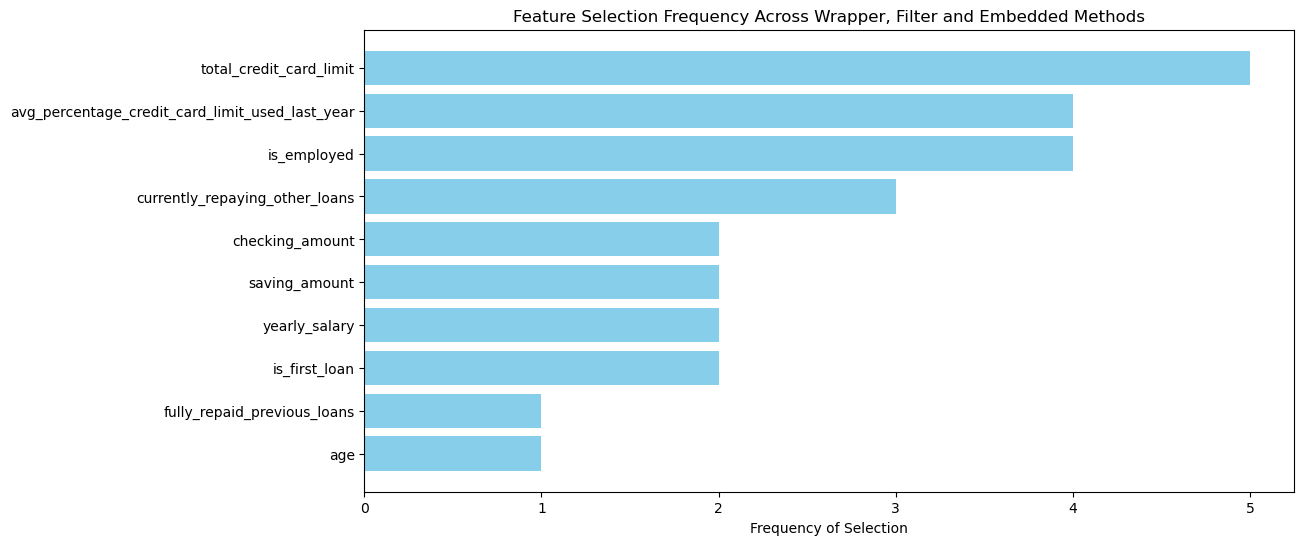

In [137]:
import matplotlib.pyplot as plt
from collections import Counter

# Combine all selected features from the lists into one
all_selected_features = cor_feature + selected_features_forward.tolist() + selected_features_backward.tolist() + selected_features_stepwise.tolist() + selected_features_lasso

# Count the frequency of each feature
feature_counts = Counter(all_selected_features)

# Extract features and their counts
features = [item[0] for item in feature_counts.most_common()]
counts = [item[1] for item in feature_counts.most_common()]

plt.figure(figsize=(12, 6))
plt.barh(features, counts, color='skyblue')
plt.xlabel('Frequency of Selection')
plt.title('Feature Selection Frequency Across Wrapper, Filter and Embedded Methods')
plt.gca().invert_yaxis()
plt.show()


In [138]:
selected_columns = list(set(all_selected_features))
selected_columns

['age',
 'checking_amount',
 'is_employed',
 'yearly_salary',
 'is_first_loan',
 'avg_percentage_credit_card_limit_used_last_year',
 'currently_repaying_other_loans',
 'total_credit_card_limit',
 'fully_repaid_previous_loans',
 'saving_amount']

# Data Distribution

Skewness and Kurtosis Check

In [139]:
skewness = merged_df.select_dtypes(include=['number']).skew()
print(skewness)

fully_repaid_previous_loans                        0.268062
currently_repaying_other_loans                     0.745332
total_credit_card_limit                            0.084087
avg_percentage_credit_card_limit_used_last_year   -1.059694
saving_amount                                      1.403283
checking_amount                                    1.044400
yearly_salary                                      0.382290
age                                                0.313038
dependent_number                                   0.429907
loan_purpose_encoded                               0.015721
date_encoded                                       0.000526
dtype: float64


In [140]:
kurtosis = merged_df.select_dtypes(include=['number']).kurtosis()
print(kurtosis)

fully_repaid_previous_loans                       -1.878197
currently_repaying_other_loans                    -0.870554
total_credit_card_limit                           -0.168438
avg_percentage_credit_card_limit_used_last_year    0.997761
saving_amount                                      1.788766
checking_amount                                    0.842597
yearly_salary                                     -0.875378
age                                               -0.460786
dependent_number                                  -1.224547
loan_purpose_encoded                              -1.197897
date_encoded                                      -1.199744
dtype: float64


Outlier Detection

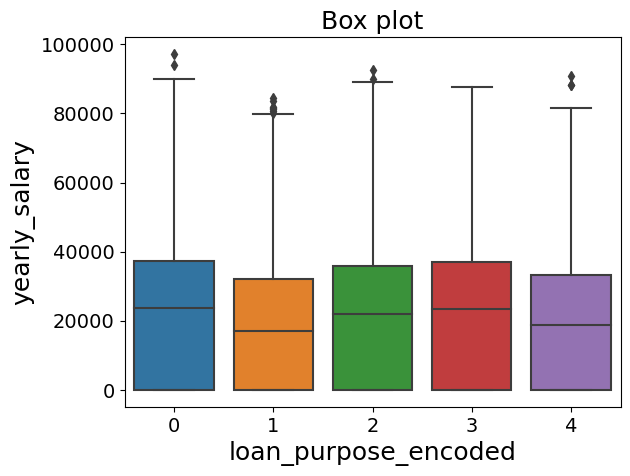

In [141]:
selected_column='yearly_salary'
fig, ax = plt.subplots()
# the size of A4 paper
#fig.set_size_inches(11.7, 8.27)

ax = sns.boxplot(x=merged_df["loan_purpose_encoded"], y=merged_df[selected_column])
ax.axes.set_title("Box plot",fontsize=18)
ax.set_xlabel('loan_purpose_encoded',fontsize=18)
ax.set_ylabel(selected_column,fontsize=18)
ax.tick_params(labelsize=14)

C:\Users\raman\AppData\Local\Temp\ipykernel_23776\1628983991.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(merged_df[merged_df['yearly_salary']>0]['yearly_salary'], bins='auto')


<Axes: xlabel='yearly_salary', ylabel='Density'>

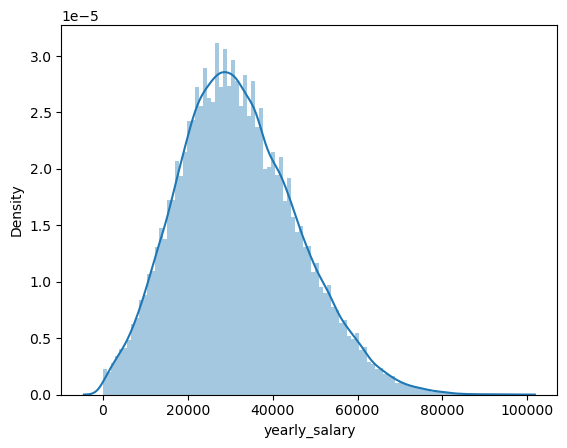

In [142]:
# sns.distplot(merged_df['yearly_salary'], bins=30)
#filtered_df = merged_df[merged_df['yearly_salary'] != 0]
# Plot the distribution without 0 values
#sns.distplot(merged_df['yearly_salary'], bins='auto')

sns.distplot(merged_df[merged_df['yearly_salary']>0]['yearly_salary'], bins='auto')

<Axes: xlabel='yearly_salary', ylabel='Count'>

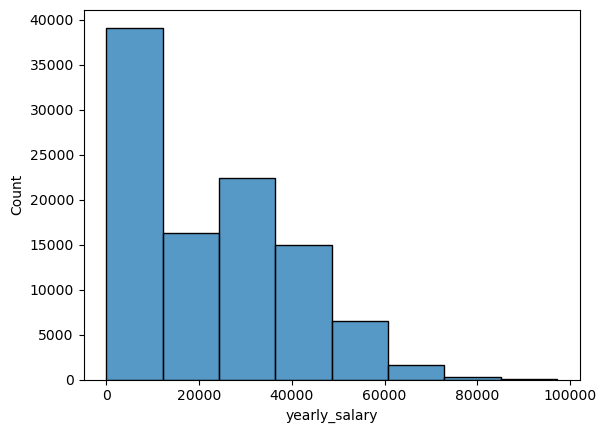

In [143]:
sns.histplot(merged_df['yearly_salary'], bins=8)

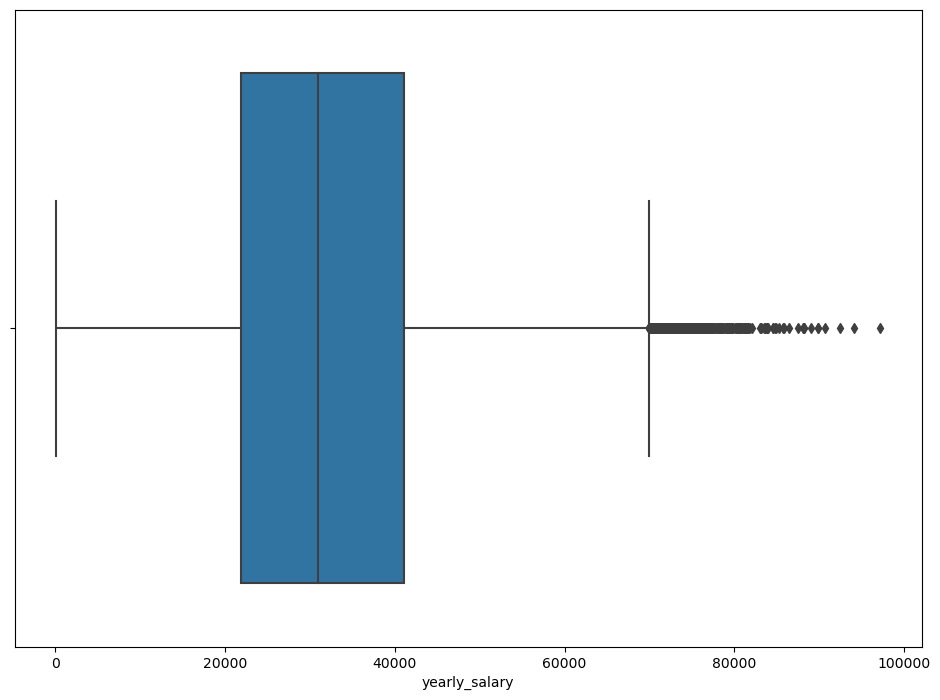

In [144]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)

ax = sns.boxplot(x=merged_df[merged_df['yearly_salary']>0]["yearly_salary"])
# ax.axes.set_title("Box plot",fontsize=20)
# ax.tick_params(labelsize=15)

In [145]:
# Shapiro-Wilk Test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import shapiro
# seed the random number generator
seed(1)
# data = 5 * randn(100) + 50

# normality test
stat, p = shapiro(merged_df[merged_df['yearly_salary']>0]["yearly_salary"])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.990, p=0.000
Sample does not look Gaussian (reject H0)


C:\Users\raman\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [146]:
#merged_df['yearly_salary_normalised'] = np.log10(merged_df['yearly_salary'] + 1)

In [147]:
#sns.distplot(merged_df[merged_df['yearly_salary_normalised']>0]['yearly_salary_normalised'], bins='auto')

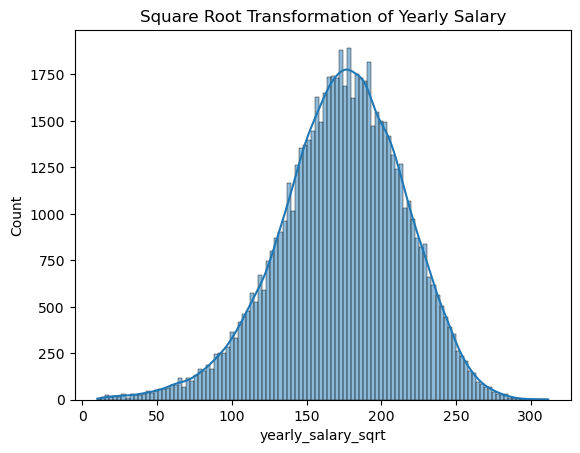

In [148]:
merged_df['yearly_salary_sqrt'] = np.sqrt(merged_df['yearly_salary'])

# Plot the new transformation
sns.histplot(merged_df[merged_df['yearly_salary_sqrt']>0]["yearly_salary_sqrt"], bins='auto', kde=True)
plt.title('Square Root Transformation of Yearly Salary')
plt.show()

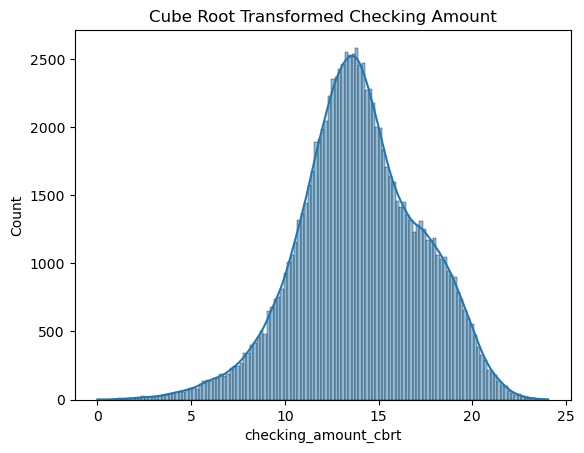

In [150]:
merged_df['checking_amount_cbrt'] = np.cbrt(merged_df['checking_amount'])
# Plot the transformed data
sns.histplot(merged_df['checking_amount_cbrt'], bins='auto', kde=True)
plt.title('Cube Root Transformed Checking Amount')
plt.show()

<Axes: xlabel='checking_amount_cbrt', ylabel='Count'>

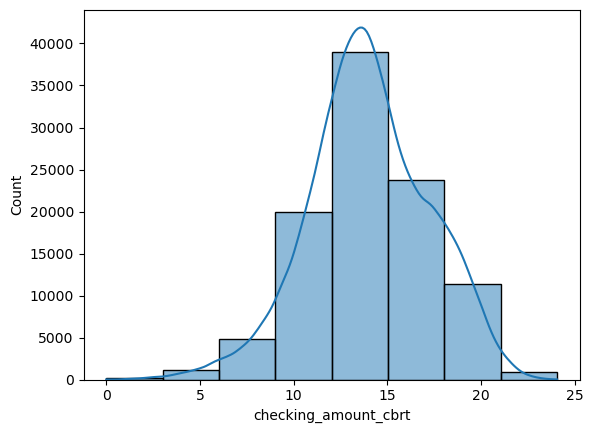

In [151]:
sns.histplot(merged_df['checking_amount_cbrt'], bins=8, kde=True)

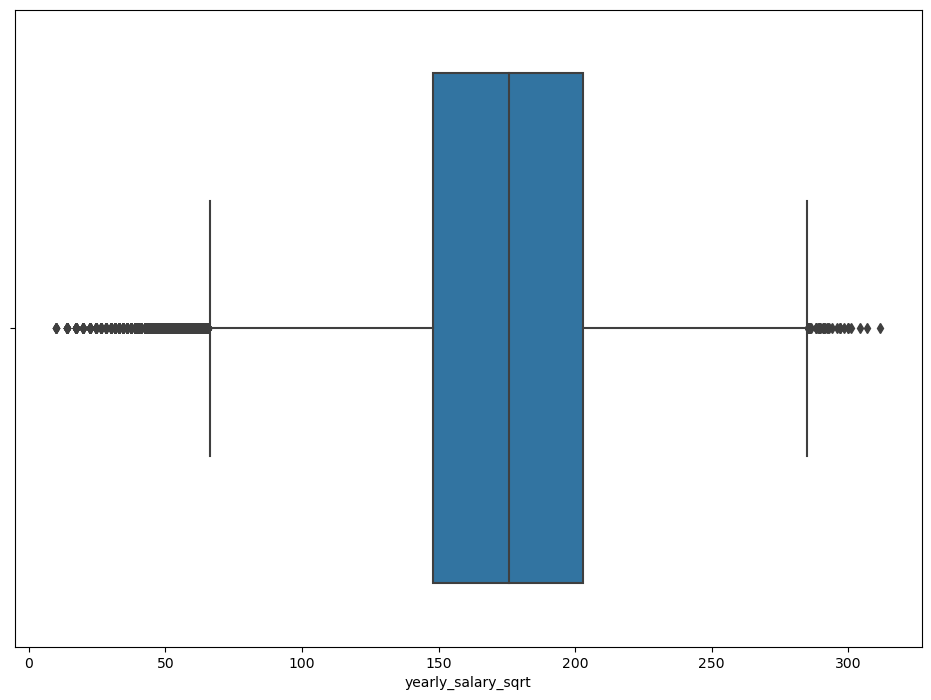

In [152]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)

ax = sns.boxplot(x=merged_df[merged_df['yearly_salary_sqrt']>0]["yearly_salary_sqrt"])
# ax.axes.set_title("Box plot",fontsize=20)
# ax.tick_params(labelsize=15)

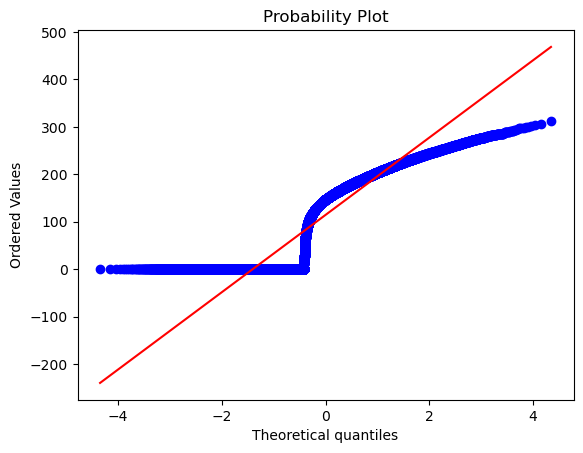

In [153]:
import scipy.stats as stats
import matplotlib.pyplot as plt

# Q-Q plot
stats.probplot(merged_df['yearly_salary_sqrt'], dist="norm", plot=plt)
plt.show()

C:\Users\raman\anaconda3\Lib\site-packages\seaborn\_stats\counting.py:137: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  bin_edges = np.histogram_bin_edges(vals, bins, binrange, weight)
C:\Users\raman\anaconda3\Lib\site-packages\seaborn\_stats\counting.py:176: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  hist, edges = np.histogram(vals, **bin_kws, weights=weights, density=density)
C:\Users\raman\anaconda3\Lib\site-packages\seaborn\_stats\counting.py:137: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  bin_edges = np.histogram_bin_edges(vals, bins, binrange, weight)
C:\Users\raman\anaconda3\Lib\site-packages\seaborn\_stats\counting.py:176: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  hist, edges = np.histogram(vals, **bin_kws, weights=weights, density=density)
C:\Users\raman\anaconda3\Lib\site-packages\seaborn\_stats\

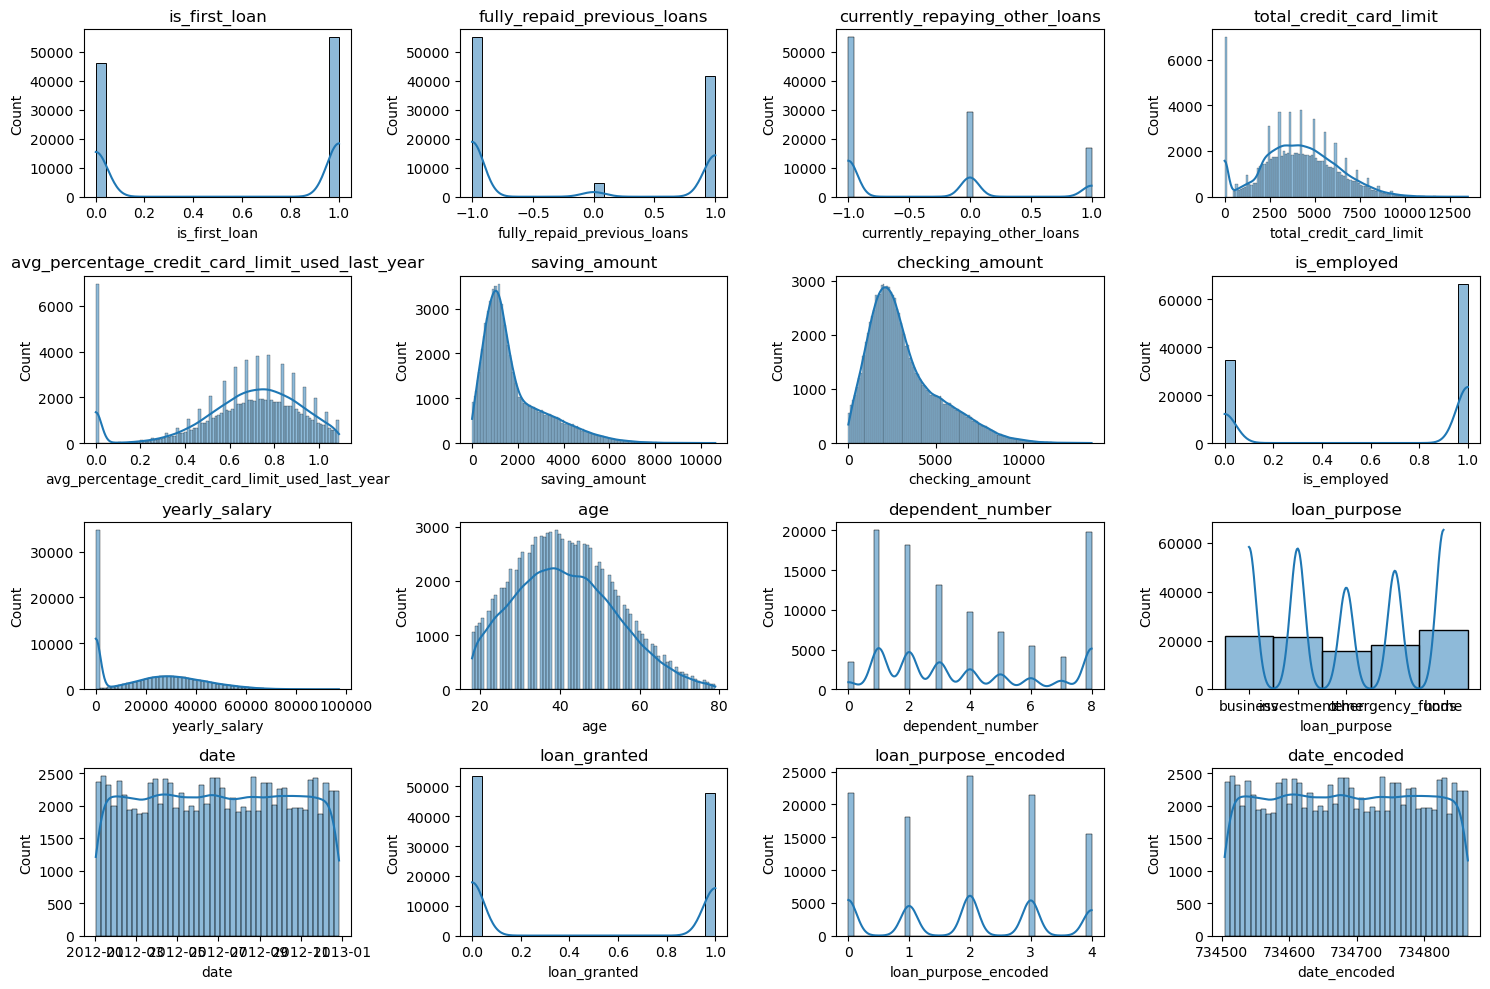

In [154]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a 4x4 grid for the plots
fig, axes = plt.subplots(4, 4, figsize=(15, 10))  # Adjust rows/cols as needed

# Flatten axes for easy index  ing
axes = axes.flatten()

# Loop through the columns and plot
for i, column in enumerate(merged_df.columns[:16]):  # Limit to 16 columns for the 4x4 grid
    sns.histplot(merged_df[column], bins='auto', ax=axes[i], kde=True)
    axes[i].set_title(column)

plt.tight_layout()
plt.show()


C:\Users\raman\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


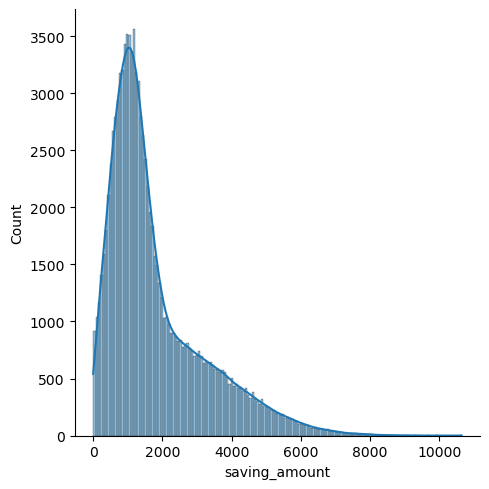

In [155]:
sns.displot(merged_df['saving_amount'], bins='auto', kde=True)

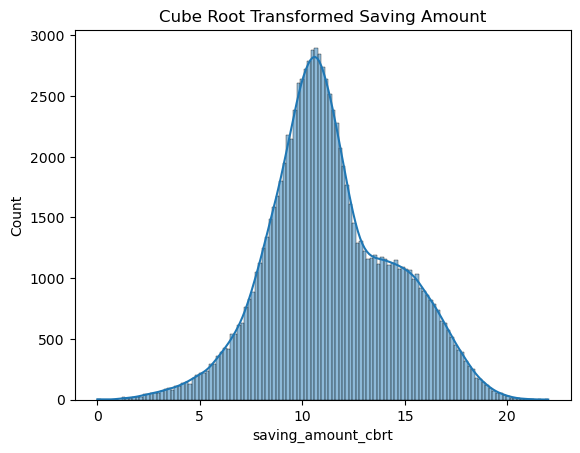

In [156]:
merged_df['saving_amount_cbrt'] = np.cbrt(merged_df['saving_amount'])

# Plot the transformed data
sns.histplot(merged_df['saving_amount_cbrt'], bins='auto', kde=True)
plt.title('Cube Root Transformed Saving Amount')
plt.show()

C:\Users\raman\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


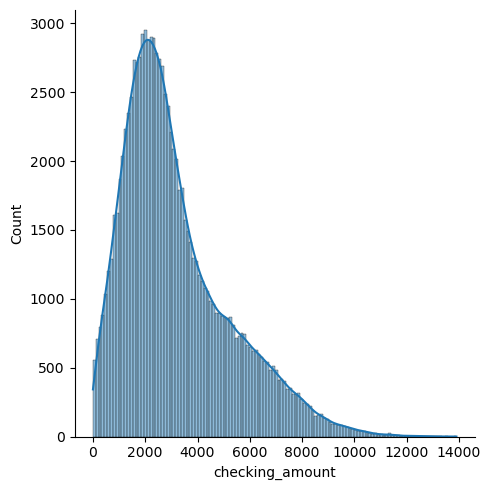

In [157]:
sns.displot(merged_df['checking_amount'], bins='auto', kde=True)

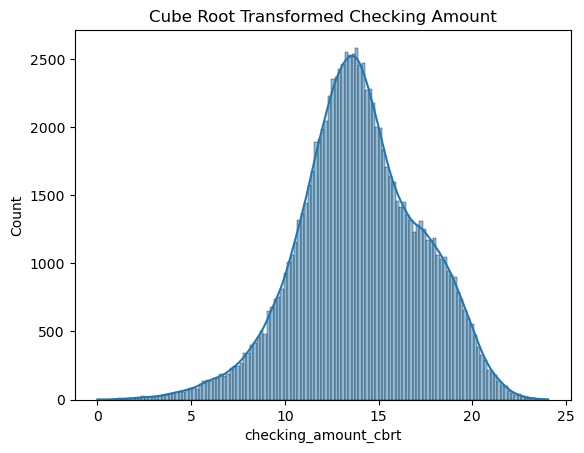

In [158]:
merged_df['checking_amount_cbrt'] = np.cbrt(merged_df['checking_amount'])
# Plot the transformed data
sns.histplot(merged_df['checking_amount_cbrt'], bins='auto', kde=True)
plt.title('Cube Root Transformed Checking Amount')
plt.show()

<Axes: xlabel='total_credit_card_limit', ylabel='Count'>

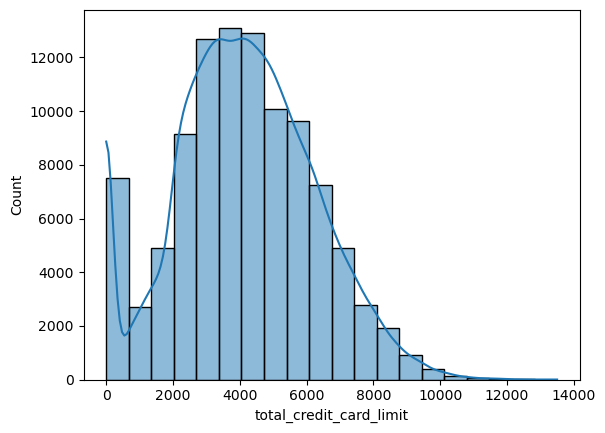

In [159]:
sns.histplot(merged_df['total_credit_card_limit'], bins=20, kde=True)

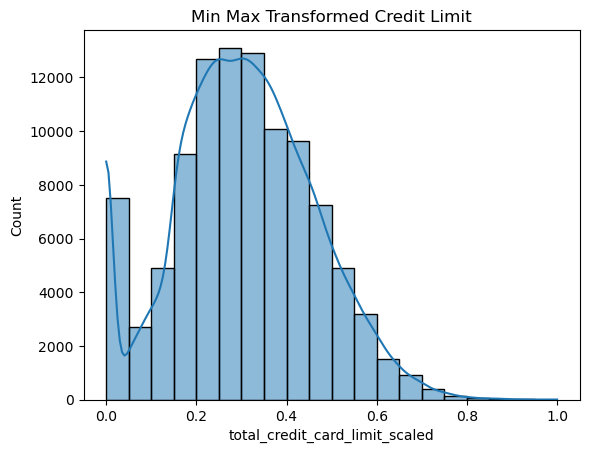

In [160]:
from sklearn.preprocessing import MinMaxScaler
# We plan not to use as 0 is impacting the Min value and the scale of the graph
# Scale 
scaler = MinMaxScaler()
merged_df['total_credit_card_limit_scaled'] = scaler.fit_transform(merged_df[['total_credit_card_limit']])
sns.histplot(merged_df['total_credit_card_limit_scaled'], bins=20, kde=True)
plt.title('Min Max Transformed Credit Limit')
plt.show()

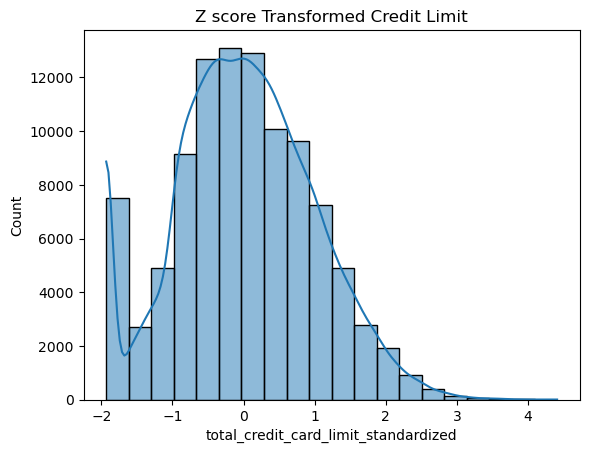

In [161]:
from sklearn.preprocessing import StandardScaler
#We plan not to use this as count of 0 is impacting the mean value for the z score
# Standardize
scaler = StandardScaler()
merged_df['total_credit_card_limit_standardized'] = scaler.fit_transform(merged_df[['total_credit_card_limit']])
sns.histplot(merged_df['total_credit_card_limit_standardized'], bins=20, kde=True)
plt.title('Z score Transformed Credit Limit')
plt.show()

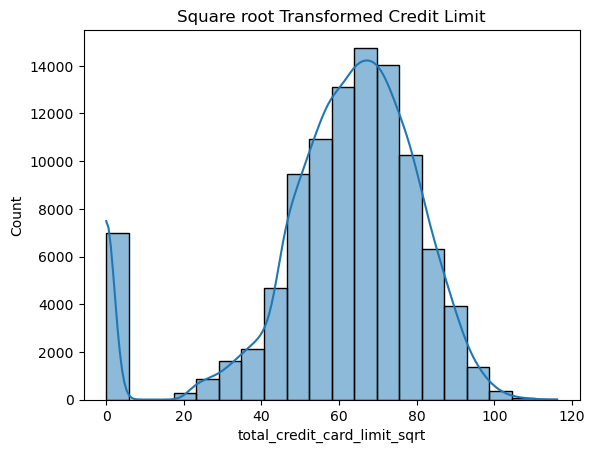

In [162]:
# Apply Square Root transformation
merged_df['total_credit_card_limit_sqrt'] = np.sqrt(merged_df['total_credit_card_limit'])
# Plot the transformed data
sns.histplot(merged_df['total_credit_card_limit_sqrt'], bins=20, kde=True)
plt.title('Square root Transformed Credit Limit')
plt.show()

In [163]:
merged_df.drop(['total_credit_card_limit_standardized'], axis=1, inplace=True)
merged_df.drop(['total_credit_card_limit_scaled'], axis=1, inplace=True)

In [164]:
merged_df.head()

,is_first_loan,fully_repaid_previous_loans,currently_repaying_other_loans,total_credit_card_limit,avg_percentage_credit_card_limit_used_last_year,saving_amount,checking_amount,is_employed,yearly_salary,age,dependent_number,loan_purpose,date,loan_granted,loan_purpose_encoded,date_encoded,yearly_salary_sqrt,checking_amount_cbrt,saving_amount_cbrt,total_credit_card_limit_sqrt
0,True,-1.0,-1.0,8000,0.49,3285,1073,False,0,47,3,business,2012-01-31,False,0,734533,0.000000,10.237641,14.865464,89.442719
1,False,1.0,0.0,4500,1.03,636,5299,True,13500,33,1,investment,2012-11-02,False,3,734809,116.189500,17.434037,8.599748,67.082039
2,True,-1.0,-1.0,6900,0.82,2085,3422,True,24500,38,8,other,2012-07-16,True,4,734700,156.524758,15.069309,12.775229,83.066239
3,False,1.0,0.0,1200,0.82,358,3388,False,0,24,1,investment,2012-06-05,False,3,734659,0.000000,15.019235,7.100588,34.641016
4,False,0.0,0.0,6900,0.80,2138,4282,True,18100,36,1,emergency_funds,2012-11-28,False,1,734835,134.536240,16.238611,12.882572,83.066239


<Axes: xlabel='avg_percentage_credit_card_limit_used_last_year', ylabel='Count'>

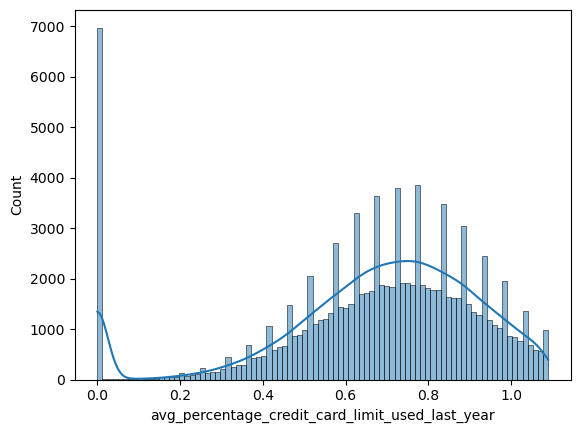

In [165]:
sns.histplot(merged_df['avg_percentage_credit_card_limit_used_last_year'], bins='auto', kde=True)

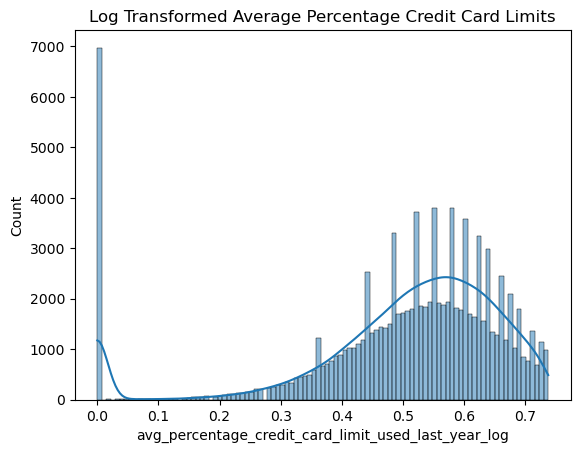

In [166]:
merged_df['avg_percentage_credit_card_limit_used_last_year_log'] = np.log1p(merged_df['avg_percentage_credit_card_limit_used_last_year'])
# Plot the transformed data
sns.histplot(merged_df['avg_percentage_credit_card_limit_used_last_year_log'], bins='auto', kde=True)
plt.title('Log Transformed Average Percentage Credit Card Limits')
plt.show()

<Axes: xlabel='age', ylabel='Count'>

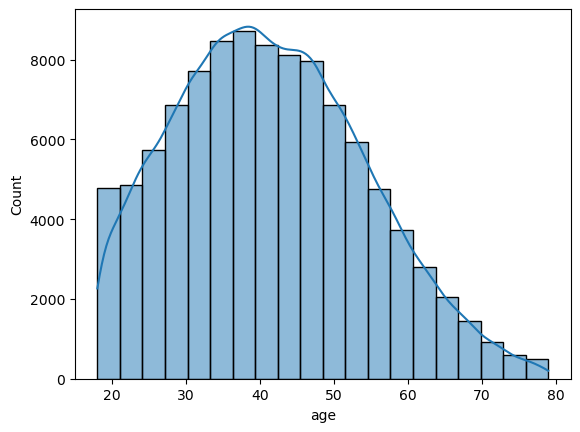

In [167]:
sns.histplot(merged_df['age'], bins=20, kde=True)

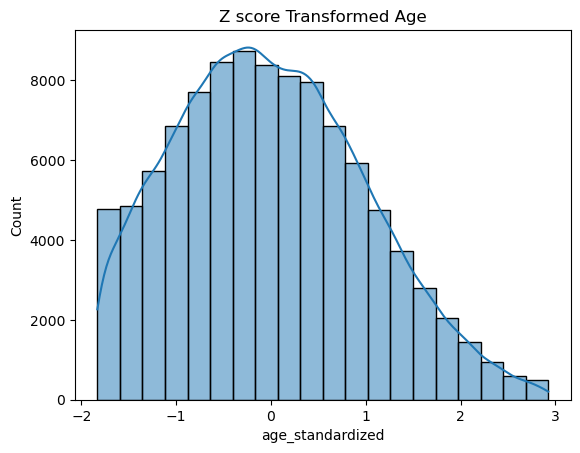

In [168]:
from sklearn.preprocessing import StandardScaler
#We plan not to use this as count of 0 is impacting the mean value for the z score
# Standardize
scaler = StandardScaler()
merged_df['age_standardized'] = scaler.fit_transform(merged_df[['age']])
sns.histplot(merged_df['age_standardized'], bins=20, kde=True)
plt.title('Z score Transformed Age')
plt.show()

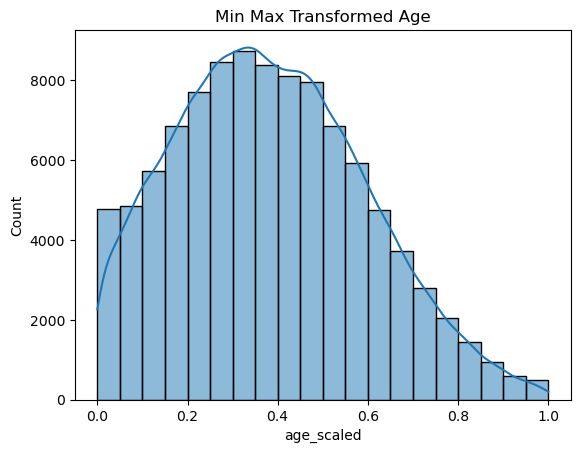

In [169]:
from sklearn.preprocessing import MinMaxScaler
# Scale 
scaler = MinMaxScaler()
merged_df['age_scaled'] = scaler.fit_transform(merged_df[['age']])
sns.histplot(merged_df['age_scaled'], bins=20, kde=True)
plt.title('Min Max Transformed Age')
plt.show()

<Axes: xlabel='dependent_number', ylabel='Count'>

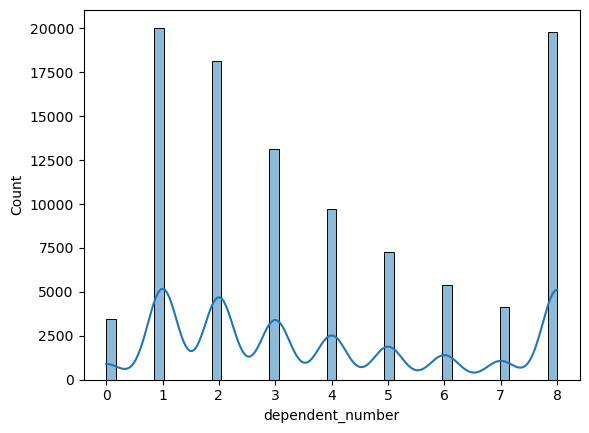

In [170]:
sns.histplot(merged_df['dependent_number'], bins='auto', kde=True)

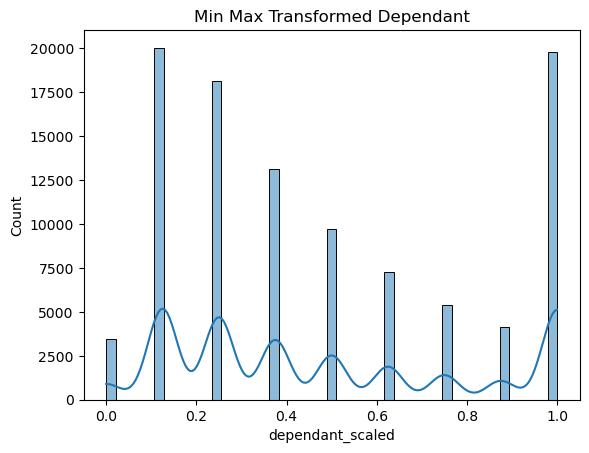

In [171]:
from sklearn.preprocessing import MinMaxScaler
# Scale 
scaler = MinMaxScaler()
merged_df['dependant_scaled'] = scaler.fit_transform(merged_df[['dependent_number']])
sns.histplot(merged_df['dependant_scaled'], bins='auto', kde=True)
plt.title('Min Max Transformed Dependant')
plt.show()

C:\Users\raman\anaconda3\Lib\site-packages\seaborn\_stats\counting.py:137: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  bin_edges = np.histogram_bin_edges(vals, bins, binrange, weight)
C:\Users\raman\anaconda3\Lib\site-packages\seaborn\_stats\counting.py:176: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  hist, edges = np.histogram(vals, **bin_kws, weights=weights, density=density)
C:\Users\raman\anaconda3\Lib\site-packages\seaborn\_stats\counting.py:137: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  bin_edges = np.histogram_bin_edges(vals, bins, binrange, weight)
C:\Users\raman\anaconda3\Lib\site-packages\seaborn\_stats\counting.py:176: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  hist, edges = np.histogram(vals, **bin_kws, weights=weights, density=density)
C:\Users\raman\anaconda3\Lib\site-packages\seaborn\_stats\

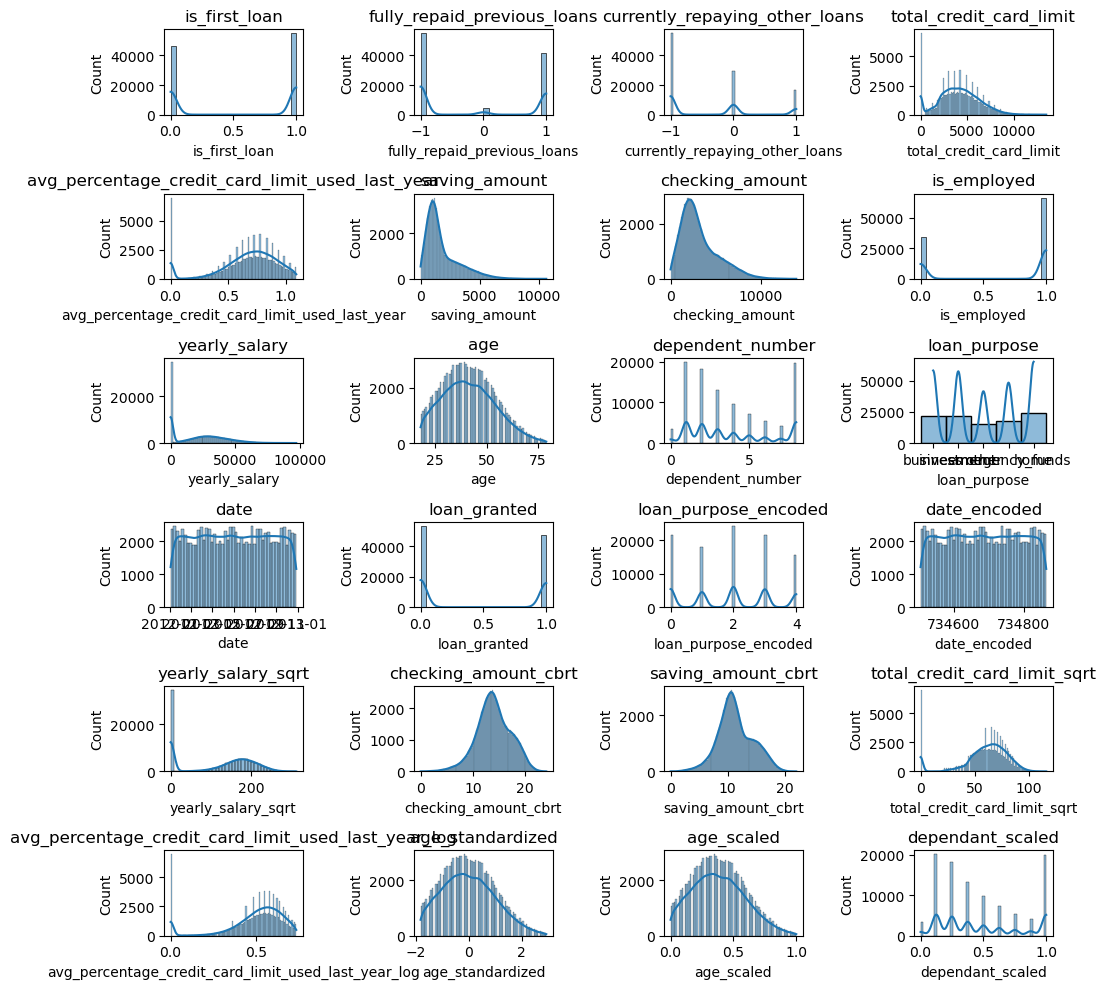

In [172]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a 4x4 grid for the plots
fig, axes = plt.subplots(6, 4, figsize=(10, 10))  # Adjust rows/cols as needed

# Flatten axes for easy index  ing
axes = axes.flatten()

# Loop through the columns and plot
for i, column in enumerate(merged_df.columns[:24]):  # Limit to 16 columns for the 4x4 grid
    sns.histplot(merged_df[column], bins='auto', ax=axes[i], kde=True)
    axes[i].set_title(column)

plt.tight_layout()
plt.show()


In [173]:
merged_df.head()

,is_first_loan,fully_repaid_previous_loans,currently_repaying_other_loans,total_credit_card_limit,avg_percentage_credit_card_limit_used_last_year,saving_amount,checking_amount,is_employed,yearly_salary,age,...,loan_purpose_encoded,date_encoded,yearly_salary_sqrt,checking_amount_cbrt,saving_amount_cbrt,total_credit_card_limit_sqrt,avg_percentage_credit_card_limit_used_last_year_log,age_standardized,age_scaled,dependant_scaled
0,True,-1.0,-1.0,8000,0.49,3285,1073,False,0,47,...,0,734533,0.000000,10.237641,14.865464,89.442719,0.398776,0.429485,0.475410,0.375
1,False,1.0,0.0,4500,1.03,636,5299,True,13500,33,...,3,734809,116.189500,17.434037,8.599748,67.082039,0.708036,-0.662089,0.245902,0.125
2,True,-1.0,-1.0,6900,0.82,2085,3422,True,24500,38,...,4,734700,156.524758,15.069309,12.775229,83.066239,0.598837,-0.272241,0.327869,1.000
3,False,1.0,0.0,1200,0.82,358,3388,False,0,24,...,3,734659,0.000000,15.019235,7.100588,34.641016,0.598837,-1.363816,0.098361,0.125
4,False,0.0,0.0,6900,0.80,2138,4282,True,18100,36,...,1,734835,134.536240,16.238611,12.882572,83.066239,0.587787,-0.428181,0.295082,0.125


In [174]:
updated_df = merged_df[['is_first_loan','fully_repaid_previous_loans','currently_repaying_other_loans','avg_percentage_credit_card_limit_used_last_year', 'is_employed', 'loan_purpose_encoded', 'date_encoded', 'yearly_salary_sqrt', 'saving_amount_cbrt', 'checking_amount_cbrt', 'total_credit_card_limit_sqrt', 'age_scaled','dependant_scaled', 'loan_granted']]
updated_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101100 entries, 0 to 101099
Data columns (total 14 columns):
 #   Column                                           Non-Null Count   Dtype  
---  ------                                           --------------   -----  
 0   is_first_loan                                    101100 non-null  bool   
 1   fully_repaid_previous_loans                      101100 non-null  float64
 2   currently_repaying_other_loans                   101100 non-null  float64
 3   avg_percentage_credit_card_limit_used_last_year  101100 non-null  float64
 4   is_employed                                      101100 non-null  bool   
 5   loan_purpose_encoded                             101100 non-null  int32  
 6   date_encoded                                     101100 non-null  int64  
 7   yearly_salary_sqrt                               101100 non-null  float64
 8   saving_amount_cbrt                               101100 non-null  float64
 9   checking_amount

# Feature Selection

### Forward Selection

In [175]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

X = updated_df.drop('loan_granted', axis=1)
y = updated_df['loan_granted']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the model
model = LogisticRegression(max_iter=1000, random_state=42)

# Forward Selection
sfs_forward = SFS(model,
                  k_features='best', 
                  forward=True, 
                  floating=False,  # No floating
                  scoring='accuracy',  # Change to your preferred metric
                  cv=5)  # 5-fold cross-validation

sfs_forward = sfs_forward.fit(X_train, y_train)

# Get the selected features
selected_features_forward = list(sfs_forward.k_feature_names_)
print("Selected features by Forward Selection:", selected_features_forward)


Selected features by Forward Selection: ['fully_repaid_previous_loans', 'currently_repaying_other_loans', 'is_employed', 'loan_purpose_encoded', 'yearly_salary_sqrt', 'total_credit_card_limit_sqrt', 'age_scaled']


### Backward Selection

In [176]:
X = updated_df.drop('loan_granted', axis=1)
y = updated_df['loan_granted']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the model
model = LogisticRegression(max_iter=1000, random_state=42)

# Backward Elimination
sfs_backward = SFS(model,
                   k_features='best',  # You can specify an integer if you want a specific number of features
                   forward=False, 
                   floating=False,  # No floating
                   scoring='accuracy',  # Change to your preferred metric
                   cv=5)  # 5-fold cross-validation

sfs_backward = sfs_backward.fit(X_train, y_train)

# Get the selected features
selected_features_backward = list(sfs_backward.k_feature_names_)
print("Selected features by Backward Elimination:", selected_features_backward)


C:\Users\raman\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\raman\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Selected features by Backward Elimination: ['currently_repaying_other_loans', 'is_employed', 'loan_purpose_encoded', 'yearly_salary_sqrt', 'total_credit_card_limit_sqrt', 'age_scaled']


### Stepwise Selection

In [177]:
X = updated_df.drop('loan_granted', axis=1)
y = updated_df['loan_granted']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the model
model = LogisticRegression(max_iter=1000, random_state=42)

# Stepwise Selection (Forward + Backward)
sfs_stepwise = SFS(model,
                   k_features='best', 
                   forward=True, 
                   floating=True,  # Floating allows for stepwise approach
                   scoring='accuracy',  # Change to your preferred metric
                   cv=5)  # 5-fold cross-validation

sfs_stepwise = sfs_stepwise.fit(X_train, y_train)

# Get the selected features
selected_features_stepwise = list(sfs_stepwise.k_feature_names_)
print("Selected features by Stepwise Selection:", selected_features_stepwise)


C:\Users\raman\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\raman\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Selected features by Stepwise Selection: ['fully_repaid_previous_loans', 'currently_repaying_other_loans', 'is_employed', 'loan_purpose_encoded', 'yearly_salary_sqrt', 'total_credit_card_limit_sqrt', 'age_scaled']


### Filter Method - Pearson Correlation

In [178]:
def cor_selector(X, y, num_features):
    cor_list = []
    feature_name = X.columns.tolist()
    # calculate the correlation with y for each feature
    for i in feature_name:
        cor = np.corrcoef(X[i], y)[0, 1]
        cor_list.append(cor)
    # replace NaN with 0
    cor_list = [0 if np.isnan(i) else i for i in cor_list]
    # feature name
    cor_feature = X.iloc[:,np.argsort(np.abs(cor_list))[-num_features:]].columns.tolist()
    # feature selection? 0 for not select, 1 for select
    cor_support = [True if i in cor_feature else False for i in feature_name]
    return cor_support, cor_feature

cor_support, cor_feature = cor_selector(X, y, 6)
print(str(len(cor_feature)), 'selected features')
print(cor_feature)

6 selected features
['avg_percentage_credit_card_limit_used_last_year', 'checking_amount_cbrt', 'saving_amount_cbrt', 'total_credit_card_limit_sqrt', 'yearly_salary_sqrt', 'is_employed']


### Embedded Method

In [179]:
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

reg = LassoCV()
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")
selected_features_lasso = X.columns[reg.coef_ != 0].tolist()
selected_features_lasso

Best alpha using built-in LassoCV: 0.020843
Best score using built-in LassoCV: 0.233459
Lasso picked 3 variables and eliminated the other 10 variables


['date_encoded', 'yearly_salary_sqrt', 'total_credit_card_limit_sqrt']

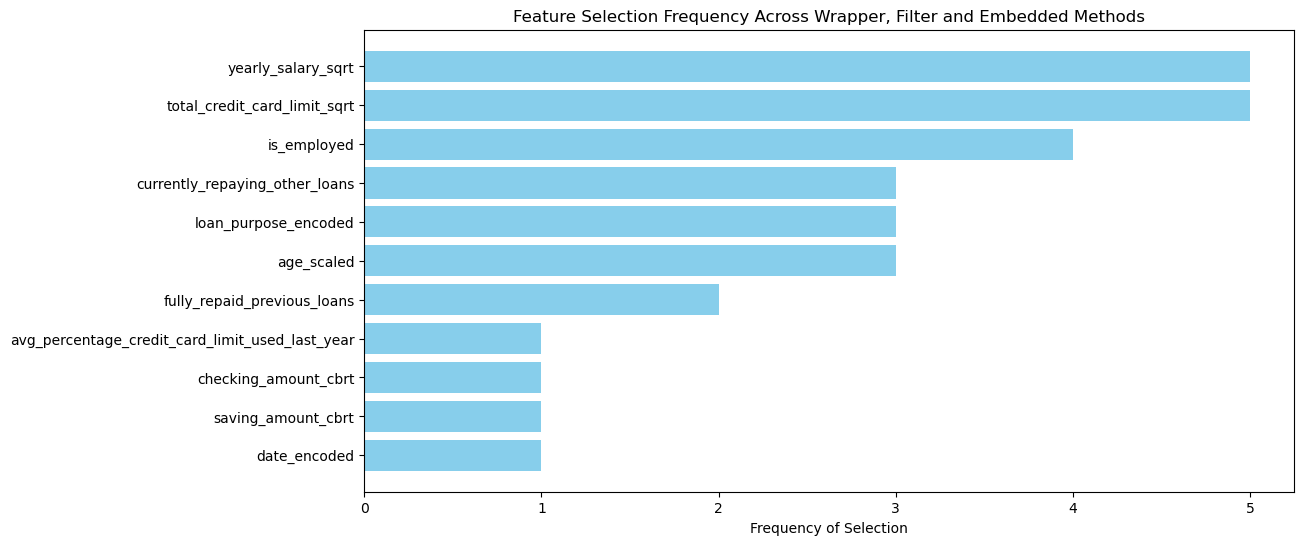

In [180]:
import matplotlib.pyplot as plt
from collections import Counter

# Combine all selected features from the lists into one
all_selected_features = selected_features_forward + selected_features_backward + selected_features_stepwise + cor_feature + selected_features_lasso

# Count the frequency of each feature
feature_counts = Counter(all_selected_features)

# Extract features and their counts
features = [item[0] for item in feature_counts.most_common()]
counts = [item[1] for item in feature_counts.most_common()]

plt.figure(figsize=(12, 6))
plt.barh(features, counts, color='skyblue')
plt.xlabel('Frequency of Selection')
plt.title('Feature Selection Frequency Across Wrapper, Filter and Embedded Methods')
plt.gca().invert_yaxis()
plt.show()


In [181]:
selected_columns = ['is_first_loan', 'fully_repaid_previous_loans', 'currently_repaying_other_loans',
                    'avg_percentage_credit_card_limit_used_last_year', 'is_employed', 'loan_purpose_encoded', 
                    'date_encoded', 'yearly_salary_sqrt', 'saving_amount_cbrt', 'checking_amount_cbrt', 
                    'total_credit_card_limit_sqrt', 'age_scaled', 'dependant_scaled', 'loan_granted']

# Calculate Pearson correlation coefficient for the selected columns
correlation_matrix = merged_df[selected_columns].corr(method='pearson')

# Print the correlation matrix
print(correlation_matrix)

                                                 is_first_loan  \
is_first_loan                                         1.000000   
fully_repaid_previous_loans                          -0.977673   
currently_repaying_other_loans                       -0.902064   
avg_percentage_credit_card_limit_used_last_year      -0.002585   
is_employed                                          -0.000971   
loan_purpose_encoded                                 -0.000080   
date_encoded                                         -0.000197   
yearly_salary_sqrt                                   -0.001425   
saving_amount_cbrt                                    0.005169   
checking_amount_cbrt                                  0.004842   
total_credit_card_limit_sqrt                         -0.000646   
age_scaled                                           -0.002353   
dependant_scaled                                      0.000887   
loan_granted                                         -0.004398   

         

In [182]:
# Create a pairplot for the selected columns
#sns.pairplot(merged_df[selected_columns], hue='loan_granted')

# Show the plot
#plt.show()

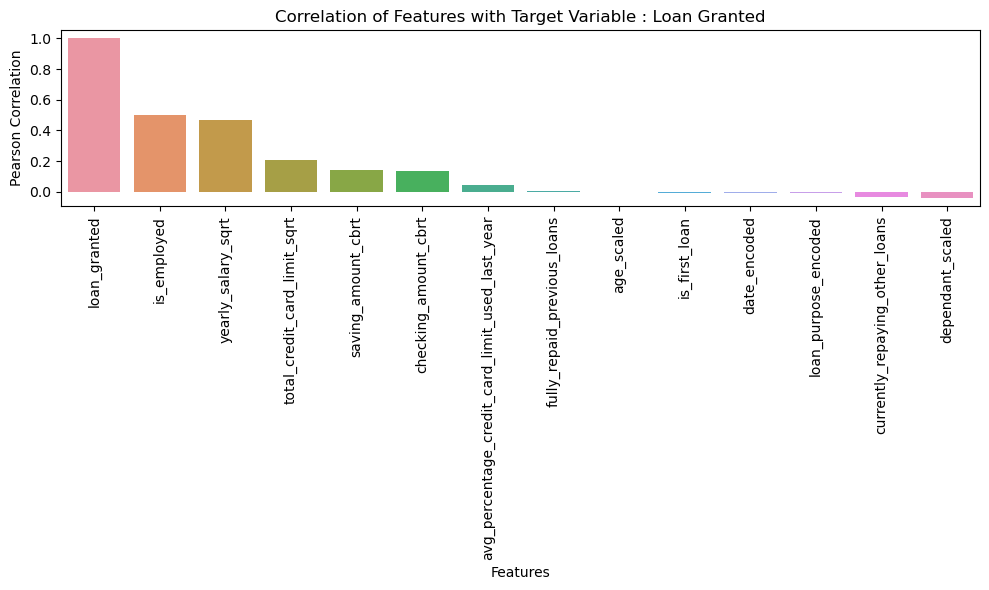

In [183]:
selected_columns = ['is_first_loan', 'fully_repaid_previous_loans', 'currently_repaying_other_loans',
                    'avg_percentage_credit_card_limit_used_last_year', 'is_employed', 'loan_purpose_encoded', 
                    'date_encoded', 'yearly_salary_sqrt', 'saving_amount_cbrt', 'checking_amount_cbrt', 
                    'total_credit_card_limit_sqrt', 'age_scaled', 'dependant_scaled', 'loan_granted']

# Calculate Pearson correlation for selected columns
correlation_matrix = merged_df[selected_columns].corr(method='pearson')

# Extract the correlation of each feature with 'loan_granted'
correlation_with_target = correlation_matrix['loan_granted'].sort_values(ascending=False)

# Plot the correlations with the target variable
plt.figure(figsize=(10, 6))  # Adjust the figure size if necessary
sns.barplot(x=correlation_with_target.index, y=correlation_with_target.values)

# Add labels and title to the plot
plt.xticks(rotation=90)  # Rotate x labels for readability
plt.title('Correlation of Features with Target Variable : Loan Granted')
plt.ylabel('Pearson Correlation')
plt.xlabel('Features')

# Show the plot
plt.tight_layout()
plt.show()


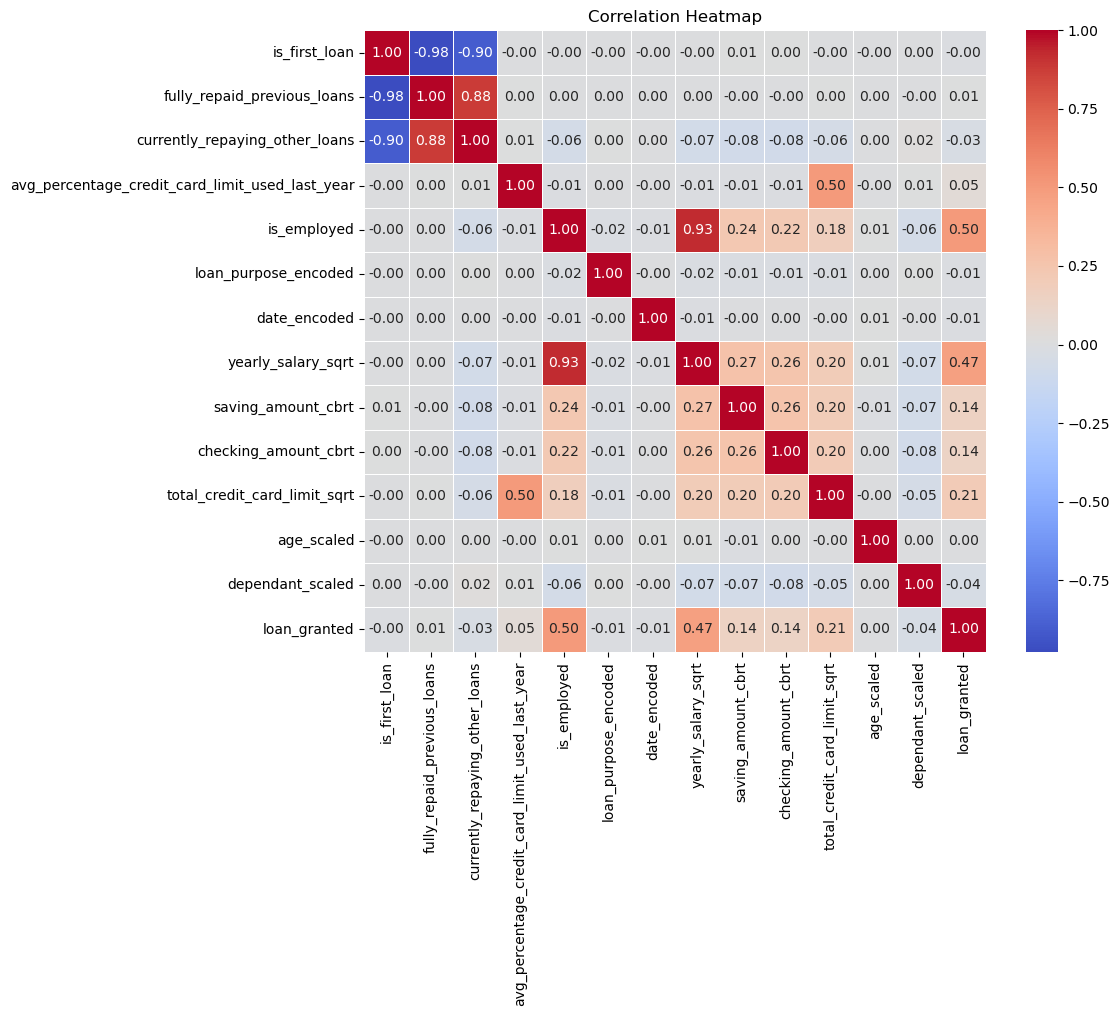

In [184]:
# Calculate the Pearson correlation matrix
correlation_matrix = merged_df[selected_columns].corr(method='pearson')

# Create the heatmap
plt.figure(figsize=(12, 10))  # Set the figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, square=True)

plt.title('Correlation Heatmap')

plt.tight_layout()
plt.show()

C:\Users\raman\anaconda3\Lib\site-packages\seaborn\_stats\counting.py:137: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  bin_edges = np.histogram_bin_edges(vals, bins, binrange, weight)
C:\Users\raman\anaconda3\Lib\site-packages\seaborn\_stats\counting.py:176: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  hist, edges = np.histogram(vals, **bin_kws, weights=weights, density=density)
C:\Users\raman\anaconda3\Lib\site-packages\seaborn\_stats\counting.py:137: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  bin_edges = np.histogram_bin_edges(vals, bins, binrange, weight)
C:\Users\raman\anaconda3\Lib\site-packages\seaborn\_stats\counting.py:176: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  hist, edges = np.histogram(vals, **bin_kws, weights=weights, density=density)


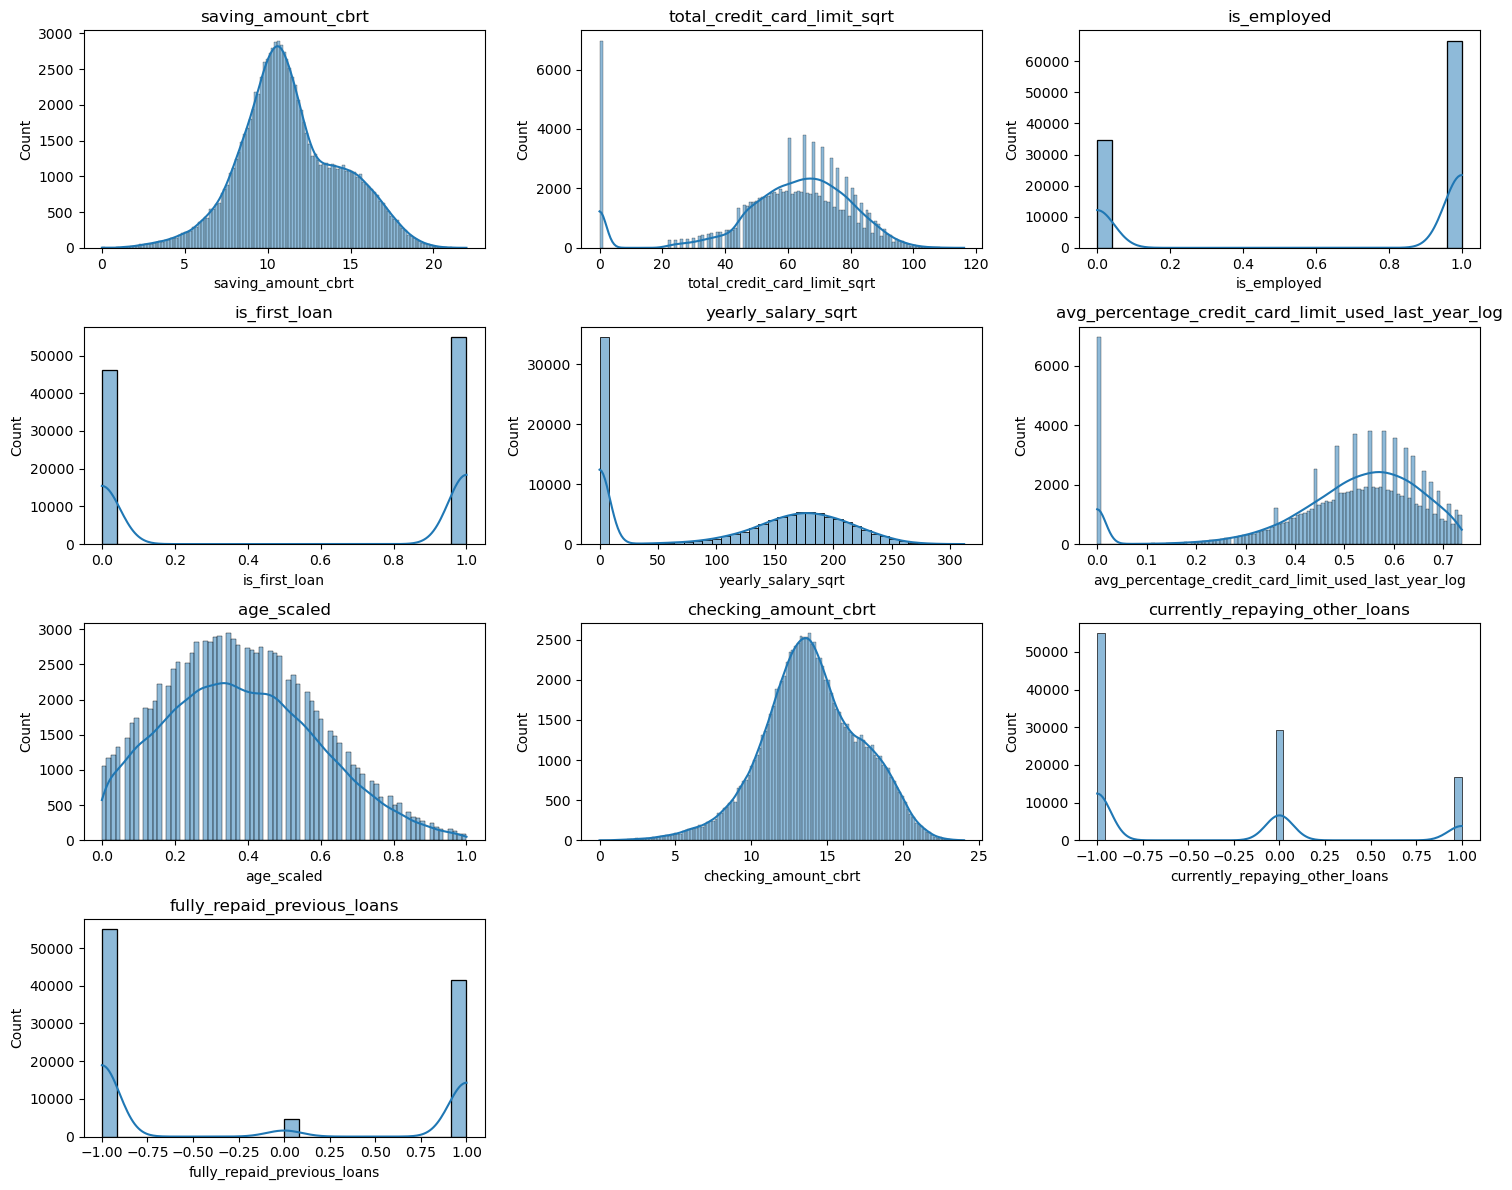

In [185]:
finalised_columns = ['saving_amount_cbrt', 'total_credit_card_limit_sqrt', 'is_employed', 'is_first_loan', 'yearly_salary_sqrt', 'avg_percentage_credit_card_limit_used_last_year_log',
'age_scaled', 'checking_amount_cbrt', 'currently_repaying_other_loans',
 'fully_repaid_previous_loans']
num_columns = len(finalised_columns)
rows = (num_columns // 3) + int(num_columns % 3 > 0)  # Calculate rows needed for a 4-column grid

# Create a grid for the plots
fig, axes = plt.subplots(rows, 3, figsize=(15, 3 * rows))  # Adjust rows dynamically based on the number of columns

# Flatten axes for easy indexing
axes = axes.flatten()

# Loop through selected columns and plot
for i, column in enumerate(finalised_columns):
    sns.histplot(merged_df[column], bins='auto', ax=axes[i], kde=True)
    axes[i].set_title(column)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

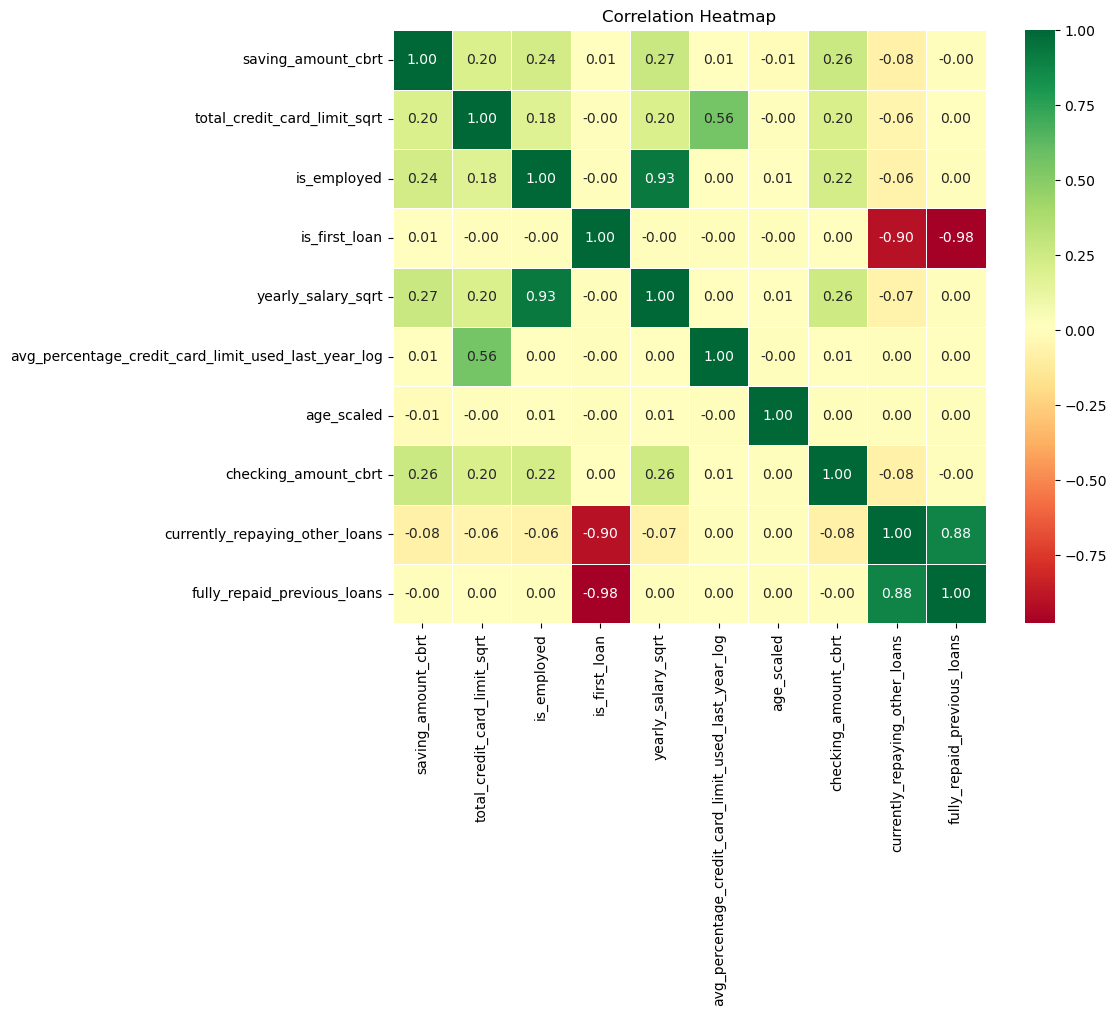

In [186]:
correlation_matrix = merged_df[finalised_columns].corr(method='pearson')

# Create the heatmap
plt.figure(figsize=(12, 10))  # Set the figure size
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlGn', fmt='.2f', linewidths=0.5, square=True)

plt.title('Correlation Heatmap')

plt.tight_layout()
plt.show()

In [187]:
skewness = merged_df[finalised_columns].skew()
print(skewness)

saving_amount_cbrt                                     0.168658
total_credit_card_limit_sqrt                          -1.277049
is_employed                                           -0.669305
is_first_loan                                         -0.174631
yearly_salary_sqrt                                    -0.268640
avg_percentage_credit_card_limit_used_last_year_log   -1.549027
age_scaled                                             0.313038
checking_amount_cbrt                                  -0.146519
currently_repaying_other_loans                         0.745332
fully_repaid_previous_loans                            0.268062
dtype: float64


In [188]:
kurtosis = merged_df[finalised_columns].kurtosis()
print(kurtosis)

saving_amount_cbrt                                    -0.043496
total_credit_card_limit_sqrt                           1.793970
is_employed                                           -1.552062
is_first_loan                                         -1.969543
yearly_salary_sqrt                                    -1.518130
avg_percentage_credit_card_limit_used_last_year_log    2.277703
age_scaled                                            -0.460786
checking_amount_cbrt                                   0.129914
currently_repaying_other_loans                        -0.870554
fully_repaid_previous_loans                           -1.878197
dtype: float64


In [189]:
finalised_columns

['saving_amount_cbrt',
 'total_credit_card_limit_sqrt',
 'is_employed',
 'is_first_loan',
 'yearly_salary_sqrt',
 'avg_percentage_credit_card_limit_used_last_year_log',
 'age_scaled',
 'checking_amount_cbrt',
 'currently_repaying_other_loans',
 'fully_repaid_previous_loans']

In [190]:
from sklearn.model_selection import train_test_split

X_final = merged_df[finalised_columns]
y_final = merged_df['loan_granted']

# Assuming X contains features and y is the target variable
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Training set size: (80880, 10)
Testing set size: (20220, 10)


# Model Implementation

LogisticRegression

In [191]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']  # Ensure solver is compatible with penalty
}

grid_search = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best parameters found:", grid_search.best_params_)
print("Best cross-validated accuracy:", grid_search.best_score_)


C:\Users\raman\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\raman\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\raman\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\raman\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\raman\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\raman\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter 

Best parameters found: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Best cross-validated accuracy: 0.7540801186943621


In [192]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report

# Initialize and train the model
log_reg = LogisticRegression(penalty='l2', solver='liblinear', C=0.1, max_iter=2000, random_state=42)

log_reg.fit(X_train, y_train)

# Make predictions
y_pred_log_reg = log_reg.predict(X_test)

# Evaluate the model
print("--- Logistic Regression ---")
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("Precision:", precision_score(y_test, y_pred_log_reg))
print("Recall:", recall_score(y_test, y_pred_log_reg))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_log_reg))
print("\nClassification Report:\n", classification_report(y_test, y_pred_log_reg))

# Plot confusion matrix
# plt.figure(figsize=(5, 4))
# sns.heatmap(confusion_matrix(y_test, y_pred_log_reg), annot=True, cmap='Blues', fmt='g')
# plt.title('Confusion Matrix - Logistic Regression')
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.show()


--- Logistic Regression ---
Accuracy: 0.7533135509396637
Precision: 0.680537873965627
Recall: 0.8978584925467142

Confusion Matrix:
 [[6679 4015]
 [ 973 8553]]

Classification Report:
               precision    recall  f1-score   support

       False       0.87      0.62      0.73     10694
        True       0.68      0.90      0.77      9526

    accuracy                           0.75     20220
   macro avg       0.78      0.76      0.75     20220
weighted avg       0.78      0.75      0.75     20220



Decision Tree

--- Configurable Decision Tree Classifier ---
Accuracy: 0.6531157270029674
Precision: 0.6330508474576271
Recall: 0.6273357127860592

Confusion Matrix:
 [[7230 3464]
 [3550 5976]]

Classification Report:
               precision    recall  f1-score   support

       False       0.67      0.68      0.67     10694
        True       0.63      0.63      0.63      9526

    accuracy                           0.65     20220
   macro avg       0.65      0.65      0.65     20220
weighted avg       0.65      0.65      0.65     20220



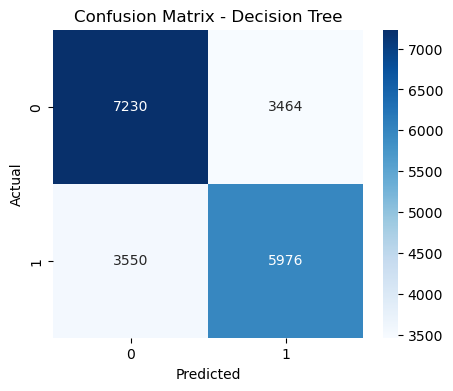

In [193]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize and configure the Decision Tree model
tree_clf = DecisionTreeClassifier(
    criterion='gini',          # 'gini' for Gini impurity and 'entropy' for information gain
    max_depth=None,            # Maximum depth of the tree; None means nodes are expanded until all leaves are pure
    min_samples_split=2,       # Minimum number of samples required to split an internal node
    min_samples_leaf=1,        # Minimum number of samples required to be at a leaf node
    max_features=None,         # Number of features to consider when looking for the best split
    splitter='best',           # 'best' to choose the best split, 'random' to choose a random split
    random_state=42            # Random state for reproducibility
)

# Train the model
tree_clf.fit(X_train, y_train)

# Make predictions
y_pred_tree = tree_clf.predict(X_test)

# Evaluate the model
print("--- Configurable Decision Tree Classifier ---")
print("Accuracy:", accuracy_score(y_test, y_pred_tree))
print("Precision:", precision_score(y_test, y_pred_tree))
print("Recall:", recall_score(y_test, y_pred_tree))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_tree))
print("\nClassification Report:\n", classification_report(y_test, y_pred_tree))

# Plot confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_tree), annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [194]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report

# Initialize and train the model
tree_clf = DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_split=2, min_samples_leaf=2, max_features=None, random_state=42)
tree_clf.fit(X_train, y_train)

# Make predictions
y_pred_tree = tree_clf.predict(X_test)

# Evaluate the model
print("--- Decision Tree Classifier ---")
print("Accuracy:", accuracy_score(y_test, y_pred_tree))
print("Precision:", precision_score(y_test, y_pred_tree))
print("Recall:", recall_score(y_test, y_pred_tree))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_tree))
print("\nClassification Report:\n", classification_report(y_test, y_pred_tree))

# Plot confusion matrix
# plt.figure(figsize=(5, 4))
# sns.heatmap(confusion_matrix(y_test, y_pred_tree), annot=True, cmap='Blues', fmt='g')
# plt.title('Confusion Matrix - Decision Tree')
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.show()


--- Decision Tree Classifier ---
Accuracy: 0.7796735905044511
Precision: 0.7131926343227109
Recall: 0.8904052068024354

Confusion Matrix:
 [[7283 3411]
 [1044 8482]]

Classification Report:
               precision    recall  f1-score   support

       False       0.87      0.68      0.77     10694
        True       0.71      0.89      0.79      9526

    accuracy                           0.78     20220
   macro avg       0.79      0.79      0.78     20220
weighted avg       0.80      0.78      0.78     20220



KNN

In [197]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best parameters found:", grid_search.best_params_)
print("Best cross-validated accuracy:", grid_search.best_score_)


Best parameters found: {'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'uniform'}
Best cross-validated accuracy: 0.731688921859545


In [198]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report

# Initialize and train the model, configured 
knn_clf = KNeighborsClassifier(n_neighbors=11, metric='euclidean', weights='uniform')

knn_clf.fit(X_train, y_train)

# Make predictions
y_pred_knn = knn_clf.predict(X_test)

# Evaluate the model
print("--- k-NN Classifier ---")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Precision:", precision_score(y_test, y_pred_knn))
print("Recall:", recall_score(y_test, y_pred_knn))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn))

# Plot confusion matrix
# plt.figure(figsize=(5, 4))
# sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, cmap='Blues', fmt='g')
# plt.title('Confusion Matrix - k-NN')
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.show()


--- k-NN Classifier ---
Accuracy: 0.7318001978239367
Precision: 0.6818222104050341
Recall: 0.8075792567709427

Confusion Matrix:
 [[7104 3590]
 [1833 7693]]

Classification Report:
               precision    recall  f1-score   support

       False       0.79      0.66      0.72     10694
        True       0.68      0.81      0.74      9526

    accuracy                           0.73     20220
   macro avg       0.74      0.74      0.73     20220
weighted avg       0.74      0.73      0.73     20220



Model Evaluation

In [199]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Function to evaluate a model
def evaluate_model(y_test, y_pred, model_name, y_proba=None):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    error_rate = 1 - accuracy
    sensitivity = recall 
    auc = roc_auc_score(y_test, y_proba) if y_proba is not None else None

    print(f"--- {model_name} ---")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Error Rate: {error_rate:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall (Sensitivity): {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    if auc is not None:
        print(f"AUC: {auc:.2f}")
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

    # Plot confusion matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='g')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Plot ROC Curve
    if y_proba is not None:
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        plt.figure(figsize=(6, 4))
        plt.plot(fpr, tpr, label=f"{model_name} (AUC = {auc:.2f})")
        plt.plot([0, 1], [0, 1], linestyle='--')  # Diagonal line
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve - {model_name}')
        plt.legend()
        plt.show()

    return {
        "Model": model_name,
        "Accuracy": accuracy,
        "Error Rate": error_rate,
        "Precision": precision,
        "Recall (Sensitivity)": recall,
        "F1 Score": f1,
        "AUC": auc
    }

--- Logistic Regression ---
Accuracy: 0.75
Error Rate: 0.25
Precision: 0.68
Recall (Sensitivity): 0.90
F1 Score: 0.77
AUC: 0.76

Confusion Matrix:
[[6679 4015]
 [ 973 8553]]

Classification Report:
               precision    recall  f1-score   support

       False       0.87      0.62      0.73     10694
        True       0.68      0.90      0.77      9526

    accuracy                           0.75     20220
   macro avg       0.78      0.76      0.75     20220
weighted avg       0.78      0.75      0.75     20220



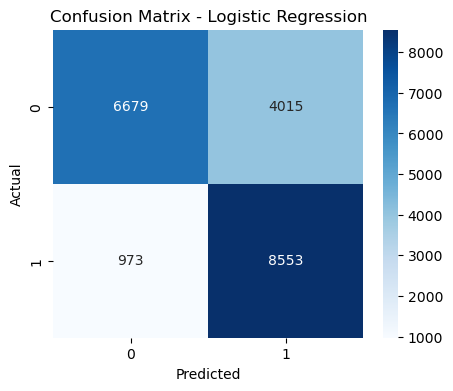

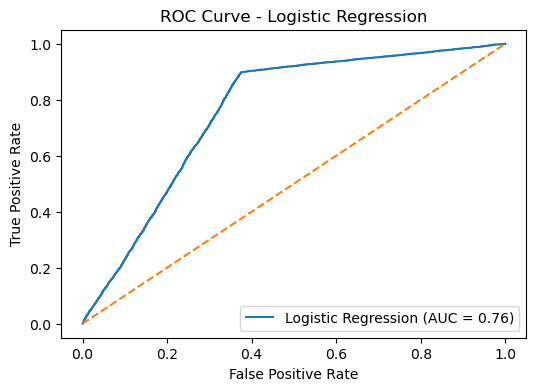

In [200]:
# Evaluate Logistic Regression
y_proba_log_reg = log_reg.predict_proba(X_test)[:, 1]  # Probability for positive class
log_reg_results = evaluate_model(y_test, y_pred_log_reg, "Logistic Regression", y_proba=y_proba_log_reg)

--- Decision Tree ---
Accuracy: 0.78
Error Rate: 0.22
Precision: 0.71
Recall (Sensitivity): 0.89
F1 Score: 0.79
AUC: 0.79

Confusion Matrix:
[[7283 3411]
 [1044 8482]]

Classification Report:
               precision    recall  f1-score   support

       False       0.87      0.68      0.77     10694
        True       0.71      0.89      0.79      9526

    accuracy                           0.78     20220
   macro avg       0.79      0.79      0.78     20220
weighted avg       0.80      0.78      0.78     20220



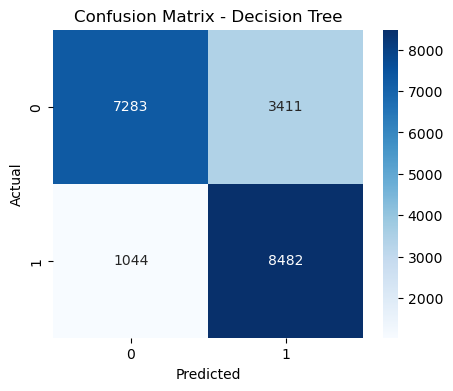

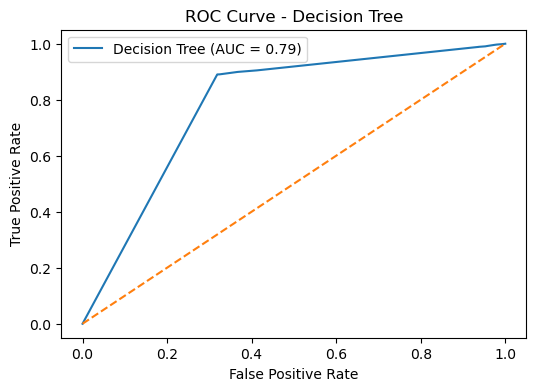

In [201]:
# Evaluate Decision Tree
y_proba_tree = tree_clf.predict_proba(X_test)[:, 1] if hasattr(tree_clf, "predict_proba") else None
tree_results = evaluate_model(y_test, y_pred_tree, "Decision Tree", y_proba=y_proba_tree)

--- k-NN ---
Accuracy: 0.73
Error Rate: 0.27
Precision: 0.68
Recall (Sensitivity): 0.81
F1 Score: 0.74
AUC: 0.76

Confusion Matrix:
[[7104 3590]
 [1833 7693]]

Classification Report:
               precision    recall  f1-score   support

       False       0.79      0.66      0.72     10694
        True       0.68      0.81      0.74      9526

    accuracy                           0.73     20220
   macro avg       0.74      0.74      0.73     20220
weighted avg       0.74      0.73      0.73     20220



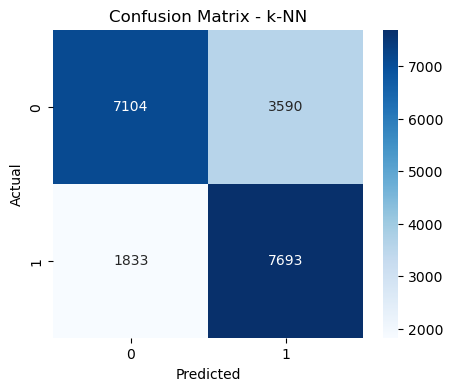

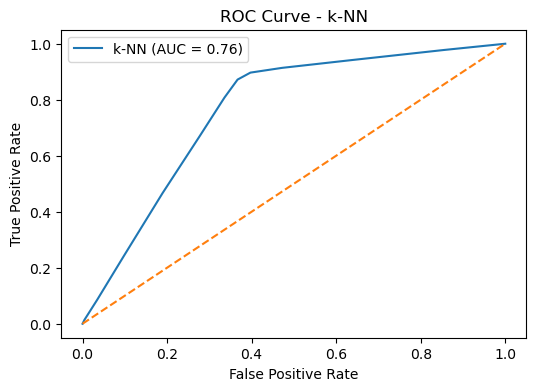

In [202]:
# Evaluate k-NN
y_proba_knn = knn_clf.predict_proba(X_test)[:, 1] if hasattr(knn_clf, "predict_proba") else None
knn_results = evaluate_model(y_test, y_pred_knn, "k-NN", y_proba=y_proba_knn)

In [203]:
# Summarize results
import pandas as pd
results_df = pd.DataFrame([log_reg_results, tree_results, knn_results]).set_index("Model")
print("\nModel Comparison Summary:")
print(results_df)


Model Comparison Summary:
                     Accuracy  Error Rate  Precision  Recall (Sensitivity)  \
Model                                                                        
Logistic Regression  0.753314    0.246686   0.680538              0.897858   
Decision Tree        0.779674    0.220326   0.713193              0.890405   
k-NN                 0.731800    0.268200   0.681822              0.807579   

                     F1 Score       AUC  
Model                                    
Logistic Regression  0.774237  0.760223  
Decision Tree        0.792007  0.785336  
k-NN                 0.739392  0.763839  


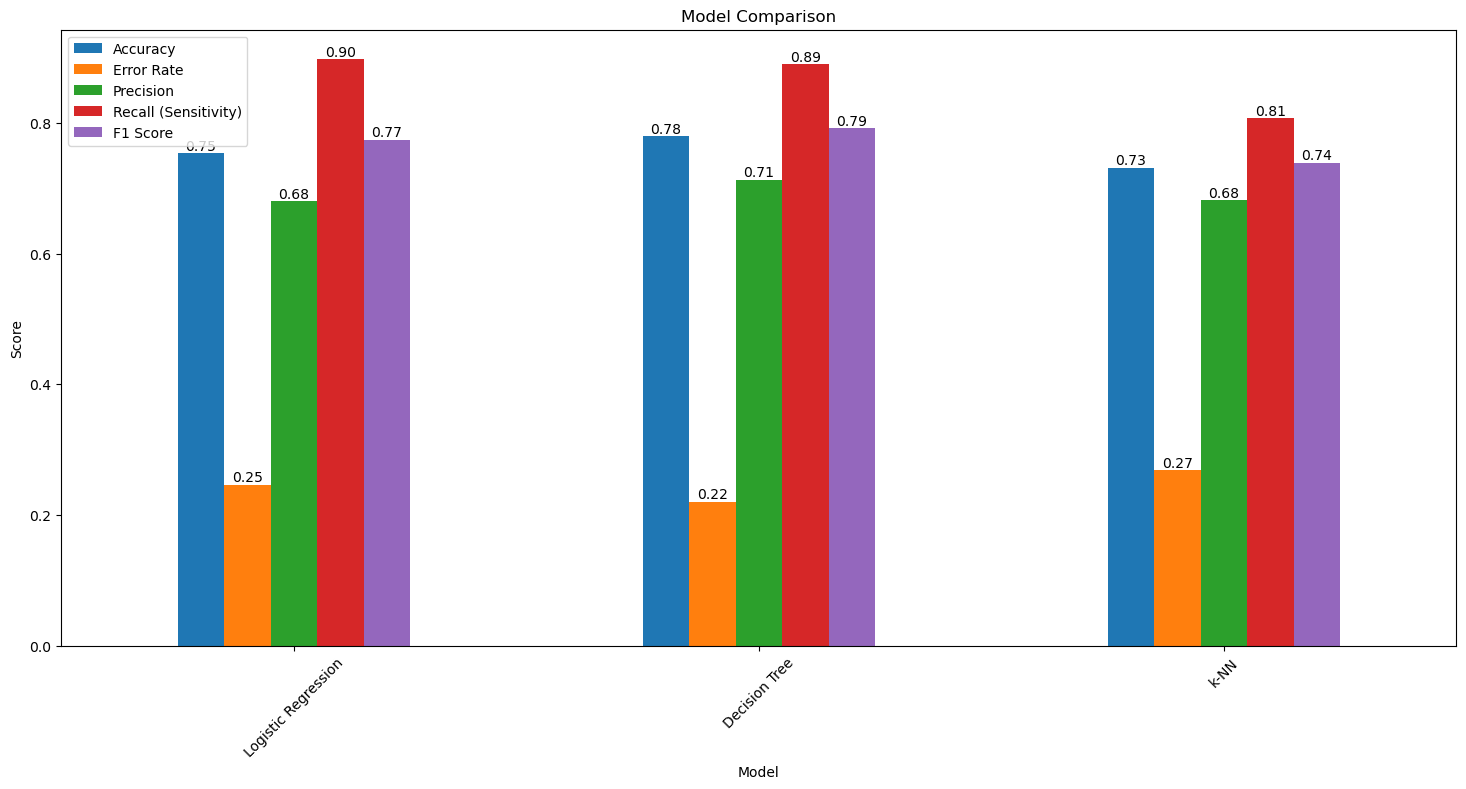

In [204]:
ax = results_df.drop(columns=["AUC"], errors='ignore').plot(kind='bar', figsize=(18, 8))

plt.title('Model Comparison')
plt.ylabel('Score')
plt.xticks(rotation=45)

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge')

plt.show()

--- Decision Tree Classifier ---
Training Accuracy: 0.7794015825914936
Testing Accuracy: 0.7796735905044511

Confusion Matrix (Test Set):
 [[7283 3411]
 [1044 8482]]

Classification Report (Test Set):
               precision    recall  f1-score   support

       False       0.87      0.68      0.77     10694
        True       0.71      0.89      0.79      9526

    accuracy                           0.78     20220
   macro avg       0.79      0.79      0.78     20220
weighted avg       0.80      0.78      0.78     20220



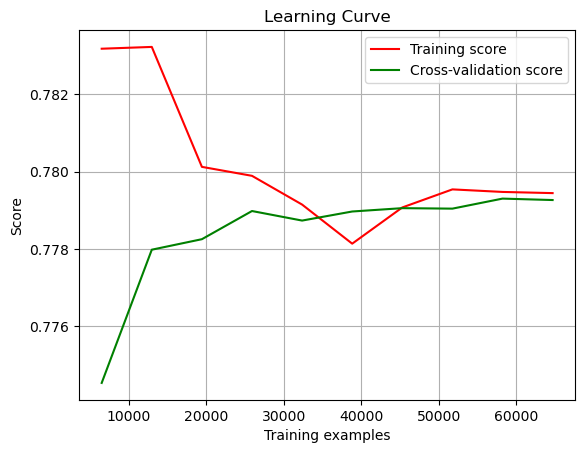

In [205]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve

# Initialize and train the model
tree_clf = DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_split=2, min_samples_leaf=2, max_features=None, random_state=42)
tree_clf.fit(X_train, y_train)

# Make predictions
y_pred_tree_train = tree_clf.predict(X_train)
y_pred_tree_test = tree_clf.predict(X_test)

# Evaluate the model
print("--- Decision Tree Classifier ---")
print("Training Accuracy:", accuracy_score(y_train, y_pred_tree_train))
print("Testing Accuracy:", accuracy_score(y_test, y_pred_tree_test))
print("\nConfusion Matrix (Test Set):\n", confusion_matrix(y_test, y_pred_tree_test))
print("\nClassification Report (Test Set):\n", classification_report(y_test, y_pred_tree_test))

# Plot learning curve
def plot_learning_curve(estimator, X, y, title="Learning Curve"):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.plot(train_sizes, train_scores_mean, label="Training score", color="r")
    plt.plot(train_sizes, test_scores_mean, label="Cross-validation score", color="g")
    plt.legend(loc="best")
    plt.grid()
    plt.show()

# Plot the learning curve for the Decision Tree
plot_learning_curve(tree_clf, X_train, y_train)


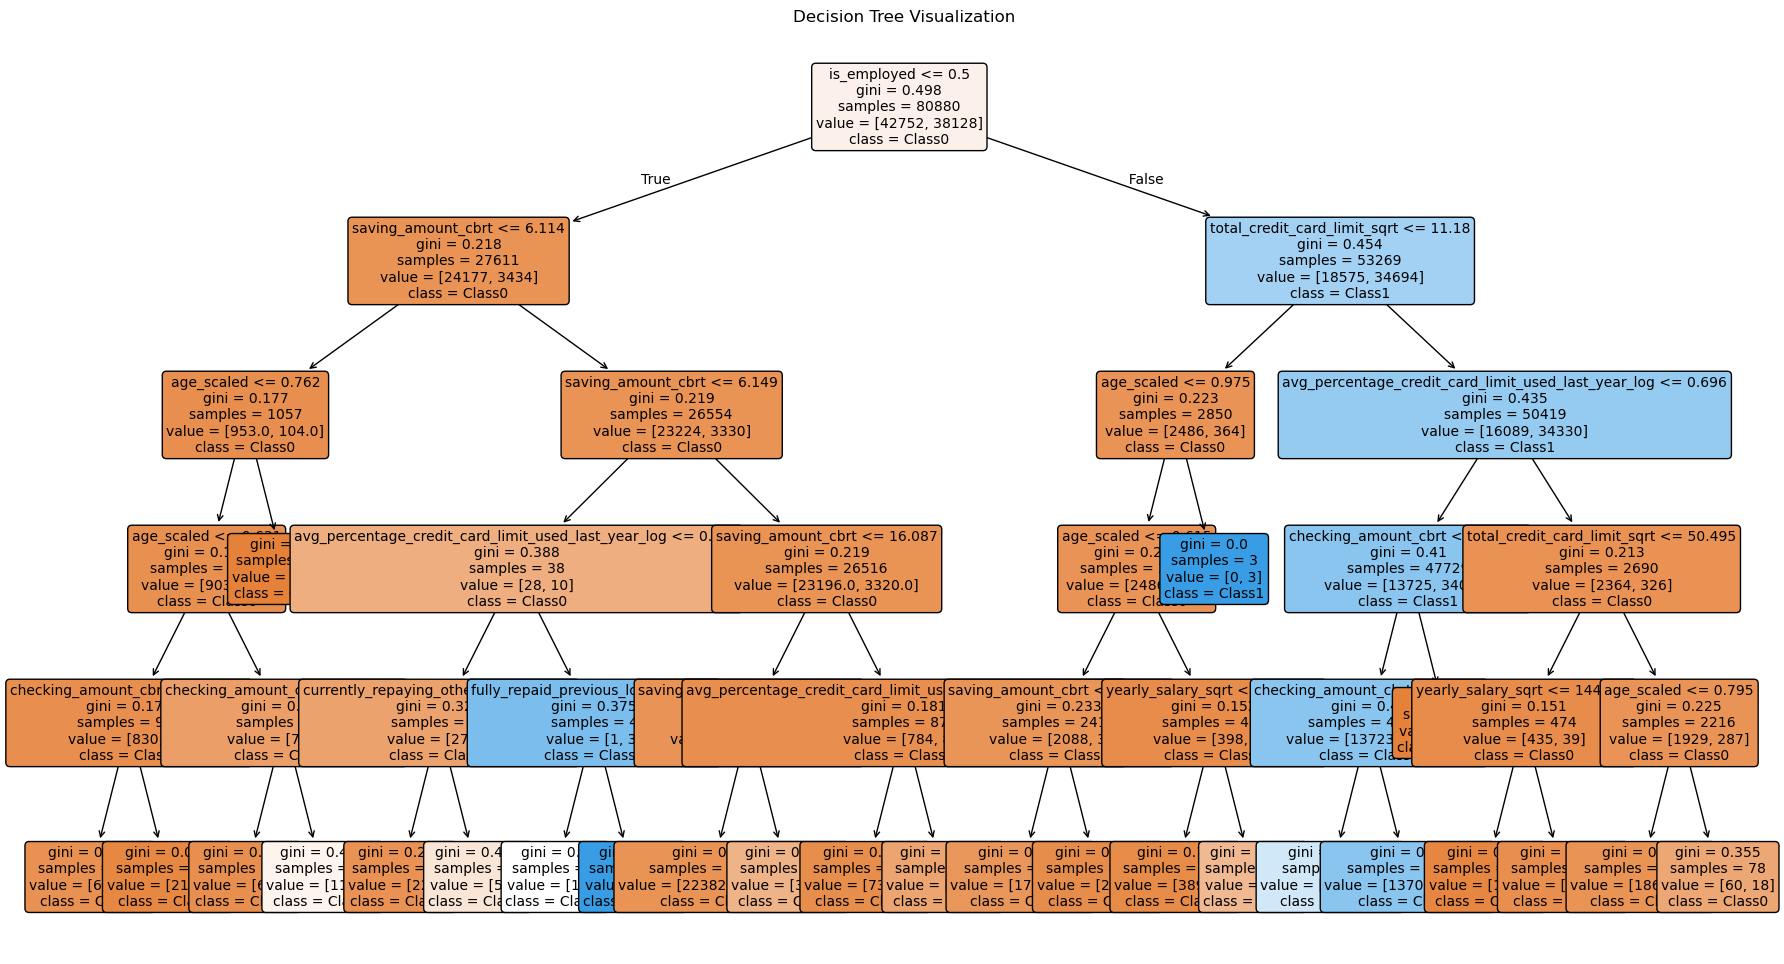

In [206]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(22, 12))
plot_tree(tree_clf, 
          feature_names=X_train.columns, 
          class_names=['Class0', 'Class1'], 
          filled=True, 
          rounded=True, 
          fontsize=10)  
plt.title('Decision Tree Visualization')
plt.show()


New Prediction

In [207]:
# Example new data point at original scale
#Example: 1
# yearly_salary = 24500
# saving_amount = 2085
# is_first_loan = True
# avg_percentage_credit_card_limit_used_last_year = 0.82
# fully_repaid_previous_loans = -1.0
# currently_repaying_other_loans = -1.0
# checking_amount = 3422
# is_employed = True
# total_credit_card_limit = 6900
# age = 38
#Example: 2
yearly_salary = 13500
saving_amount = 636
is_first_loan = False
avg_percentage_credit_card_limit_used_last_year = 1.03
fully_repaid_previous_loans = 1.0
currently_repaying_other_loans = 0.0
checking_amount = 5299
is_employed = True
total_credit_card_limit = 4500
age = 33

# Transformations
age_scaler = StandardScaler()
age_scaled = age_scaler.fit_transform([[age]])[0, 0]

# Log transformation 
avg_percentage_credit_card_limit_used_last_year_log = np.log(avg_percentage_credit_card_limit_used_last_year + 1)

# Cube root transformation
checking_amount_cbrt = np.cbrt(checking_amount)
saving_amount_cbrt = np.cbrt(saving_amount)

# Square root transformation
total_credit_card_limit_sqrt = np.sqrt(total_credit_card_limit)
yearly_salary_sqrt = np.sqrt(yearly_salary)

# Boolean and other variables stay as it is for is_employed, is_first_loan, fully_repaid_previous_loans, currently_repaying_other_loans

# Final array
new_data_transformed = np.array([[saving_amount_cbrt, total_credit_card_limit_sqrt, is_employed, is_first_loan, yearly_salary_sqrt, avg_percentage_credit_card_limit_used_last_year_log, age_scaled, checking_amount_cbrt, currently_repaying_other_loans, fully_repaid_previous_loans]])

columns = ['saving_amount_cbrt', 'total_credit_card_limit_sqrt', 'is_employed', 
           'is_first_loan', 'yearly_salary_sqrt', 'avg_percentage_credit_card_limit_used_last_year_log', 
           'age_scaled', 'checking_amount_cbrt', 'currently_repaying_other_loans', 
           'fully_repaid_previous_loans']

new_data_df = pd.DataFrame(new_data_transformed, columns=columns)

# Predict using the trained Decision Tree model
prediction = tree_clf.predict(new_data_df)
print("Prediction for the new data point:", prediction)

Prediction for the new data point: [False]


Fairness Metrics

Accuracy: 0.65

Classification Report:
               precision    recall  f1-score   support

       False       0.67      0.68      0.67     10694
        True       0.63      0.63      0.63      9526

    accuracy                           0.65     20220
   macro avg       0.65      0.65      0.65     20220
weighted avg       0.65      0.65      0.65     20220



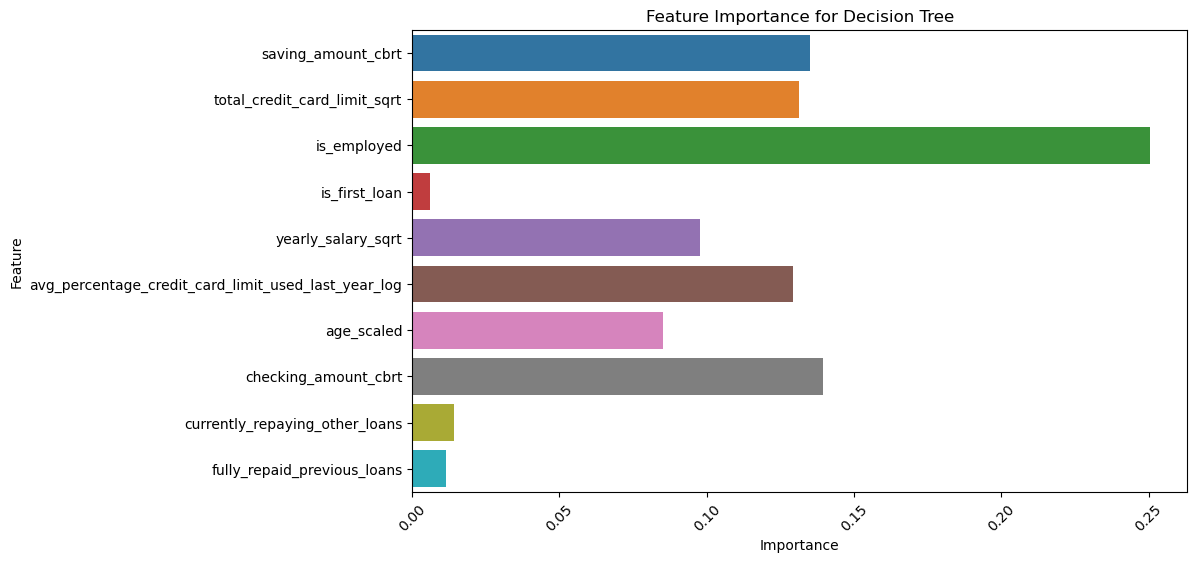

In [209]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

X = merged_df[finalised_columns]
y = merged_df['loan_granted']

# Convert any non-numeric data to numeric (if applicable)
X_encoded = pd.get_dummies(X, drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree model
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

# Make predictions
y_pred = tree_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Plot the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=tree_clf.feature_importances_, y=X_encoded.columns)
plt.title('Feature Importance for Decision Tree')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.xticks(rotation=45)
plt.show()


Overall Metrics:
 Accuracy          0.779674
Recall            0.890405
Selection Rate    0.588180
dtype: float64

Metrics by sensitive attribute (is_employed):
             Accuracy    Recall  Selection Rate
is_employed                                    
False        0.874873  0.000000        0.000000
True         0.730391  0.979107        0.892667


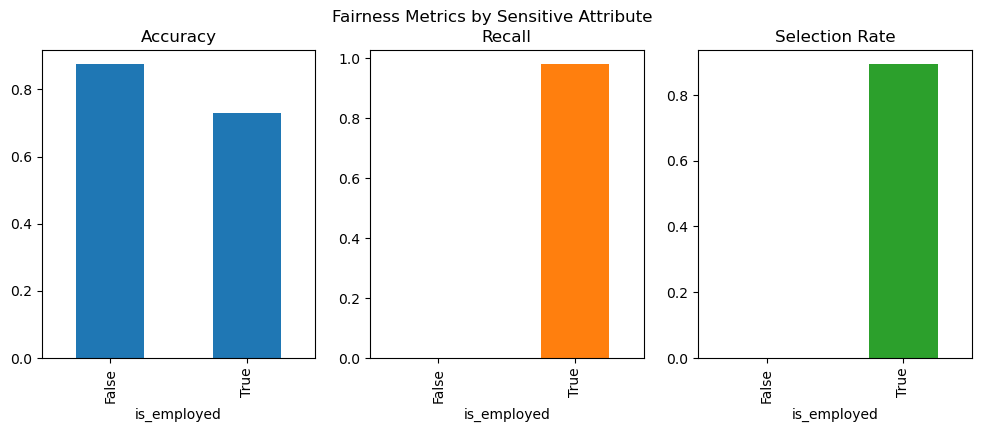

In [210]:
from fairlearn.metrics import MetricFrame, selection_rate, demographic_parity_difference
from sklearn.metrics import accuracy_score, recall_score

# Sensitive feature to check for fairness
sensitive_feature = 'is_employed'  # Sensitive attribute to assess
y_true = y_test  # Actual target values
y_pred = y_pred_tree  # Predictions from your Decision Tree model

# Convert to DataFrame to use sensitive features from X_test
df_test = X_test.copy()
df_test['loan_granted'] = y_true
df_test['predicted_loan_granted'] = y_pred

# Compute fairness metrics using Fairlearn
metric_frame = MetricFrame(
    metrics={"Accuracy": accuracy_score, "Recall": recall_score, "Selection Rate": selection_rate},
    y_true=y_true,
    y_pred=y_pred,
    sensitive_features=df_test[sensitive_feature]
)

# Display metrics
print("Overall Metrics:\n", metric_frame.overall)
print("\nMetrics by sensitive attribute (is_employed):")
print(metric_frame.by_group)

# Plotting differences in metrics
metric_frame.by_group.plot.bar(
    subplots=True, layout=[1, 3], figsize=(12, 4), legend=False, title="Fairness Metrics by Sensitive Attribute"
)
plt.show()


In [211]:
from aif360.datasets import StandardDataset
from aif360.metrics import BinaryLabelDatasetMetric
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X = merged_df[finalised_columns]
y = merged_df['loan_granted']

# Encode any non-numeric data (if applicable) - assuming 'is_employed' is numeric here
X_encoded = pd.get_dummies(X, drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Train a Decision Tree model
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

# Make predictions
y_pred = tree_clf.predict(X_test)

# Create a DataFrame for predictions to align with original dataset structure
X_test = X_test.copy()
X_test['loan_granted'] = y_pred

# Create a BinaryLabelDataset using aif360
dataset = StandardDataset(
    X_test,
    label_name='loan_granted',
    favorable_classes=[1],  # Positive class indicating a favorable outcome
    protected_attribute_names=['is_employed'],  # Sensitive attribute
    privileged_classes=[[1]],  # Privileged class (e.g., employed)
    features_to_drop=[]  # Specify features to drop if necessary
)

# Define privileged and unprivileged groups
privileged_groups = [{'is_employed': 1}]
unprivileged_groups = [{'is_employed': 0}]

# Compute fairness metrics
metric = BinaryLabelDatasetMetric(dataset, unprivileged_groups=unprivileged_groups, privileged_groups=privileged_groups)
print("Demographic parity difference:", metric.mean_difference())
print("Disparate impact:", metric.disparate_impact())
print("Statistical parity difference:", metric.statistical_parity_difference())


pip install 'aif360[AdversarialDebiasing]'
pip install 'aif360[AdversarialDebiasing]'
pip install 'aif360[inFairness]'


Demographic parity difference: -0.48894047736930873
Disparate impact: 0.2283636602711087
Statistical parity difference: -0.48894047736930873
